# Load Modules

In [1]:
import pandas as pd
# import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
from sklearn.impute import SimpleImputer
import scipy
from scipy import stats
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pandas.plotting import scatter_matrix
from pandas.plotting import autocorrelation_plot
from pandas.plotting import parallel_coordinates
from pandas.plotting import lag_plot

Predictive Models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

# Load Data
## Load Relevant 2003 and 2004 LEAPS Datasets

In [2]:
# 2003 leaps data
child_03 = pd.read_stata('/Users/bentaylor/Documents/Data/LEAPS data/2003/public_child1.dta',
            columns = ['childcode', 'ch1_s1q3'])
child_roster_03 = pd.read_stata('/Users/bentaylor/Documents/Data/LEAPS data/2003/public_childroster1.dta',
            columns = ['childcode', 'cr1_s1q5', 'cr1_s2q6'])
hhs_household_03 = pd.read_stata('/Users/bentaylor/Documents/Data/LEAPS data/2003/public_hhsurvey1_household.dta',
            columns = ['hhid', 'mauzaid', 'hf1_s13q1_have', 'hf1_s13q3_have', 'hm1_s11q1'])
master_children_03 = pd.read_stata('/Users/bentaylor/Documents/Data/LEAPS data/2003/public_master_children1.dta',
            columns = ['childcode', 'hhid', 'child_teachercode1', 'child_schoolid1',
                      'child_english_scale1', 'child_urdu_scale1', 'child_math_scale1', 'child_female'])
teacher_roster_03 = pd.read_stata('/Users/bentaylor/Documents/Data/LEAPS data/2003/public_teacherroster1.dta',
            columns = ['child_teachercode1', 'tr1_s1q2', 'tr1_s1q4', 'tr1_s1q7', 'tr1_s1q8', 'tr1_s1q9',
                       'tr1_s1q10', 'tr1_s1q11'])
                
# 2004 leaps data
master_children_04 = pd.read_stata('/Users/bentaylor/Documents/Data/LEAPS data/2004/public_master_children2.dta',
            columns = ['childcode', 'hhid', 'child_teachercode2', 'child_female','child_english_scale2', 'child_math_scale2', 'child_urdu_scale2', 'child_class2'])
child_04 = pd.read_stata('/Users/bentaylor/Documents/Data/LEAPS data/2004/public_child2.dta',
            columns = ['childcode', 'ch2_s1q3', 'ch2_s2q2', 'ch2_s2q3']) # ch2_s0q1_code from correlation assessment
child_roster_04 = pd.read_stata('/Users/bentaylor/Documents/Data/LEAPS data/2004/public_childroster2.dta',
            columns = ['childcode', 'cr2_s2q6', 'cr2_s2q7'])
hhs_household_04 = pd.read_stata('/Users/bentaylor/Documents/Data/LEAPS data/2004/public_hhsurvey2_household.dta', convert_categoricals=False,
            columns = ['hhid', 'h2_s0q1_code', 'h2_s13q8', 'h2_s0q4_code'])
hhs_member_04 = pd.read_stata('/Users/bentaylor/Documents/Data/LEAPS data/2004/public_hhsurvey2_member.dta',
            columns = ['hhid', 'h2_s4q3_type', 'h2_s4q4',
                        'h2_s10q4_sub2', 'h2_s5q2e3'])
hhs_school_04 = pd.read_stata('/Users/bentaylor/Documents/Data/LEAPS data/2004/public_hhsurvey2_school.dta',
            columns = ['hhid'])
teacher_04 = pd.read_stata('/Users/bentaylor/Documents/Data/LEAPS data/2004/public_teacher2.dta',
            columns = ['teachercode2t','tq2_s3q1','tq2_s8q1','tq2_s8q3', 'tq2_s8q5'])
teacher_roster_04 = pd.read_stata('/Users/bentaylor/Documents/Data/LEAPS data/2004/public_teacherroster2.dta',
            columns = ['teachercode2tr', 'tr2_q4', 'tr2_q8', 'tr2_q7', 'tr2_q11'])

## Make DataFrame for 2003: df2003

In [3]:
grades_03 = master_children_03.rename(columns = {'child_english_scale1': 'english', 'child_urdu_scale1': 
                'urdu', 'child_math_scale1': 'math', 'child_female': 'student_sex'})

merge1_03 = pd.merge(grades_03, child_roster_03,
                on = 'childcode', how = 'left',suffixes=('left','right'))
merge1_03 = merge1_03.rename(columns = {'childcode': 'childcode', 'cr1_s1q5': 'grade',
                'cr1_s2q6': 'teacher_rates_child_how_good_in_studies'})

merge2_03 = pd.merge(merge1_03, child_03,
                on = 'childcode', how = 'left', suffixes = ('left','right'))
merge2_03 = merge2_03.rename(columns = {'childcode': 'childcode',
                'ch1_s1q3': 'child_studied_at_diff_school'})

merge3_03 = pd.merge(merge2_03, teacher_roster_03,
                on = 'child_teachercode1', how = 'left', suffixes = ('left','right'))
merge3_03 = merge3_03.rename(columns = {'child_teachercode1': 'child_teachercode', 'tr1_s1q2': 'teacher_sex',
                'tr1_s1q4': 'teacher_years_teaching',
                'tr1_s1q7': 'teacher_qualifications', 'tr1_s1q8': 'teacher_training', 'tr1_s1q9': 'salary_monthly_Rs',
                'tr1_s1q10': 'teacher_from_mauza',
                'tr1_s1q11': 'teacher_days_absent_last_mo'})

df2003 = pd.merge(merge3_03, hhs_household_03,
                on = 'hhid', how = 'left', suffixes = ('left','right'))
df2003 = df2003.rename(columns = {                                
                'hhid': 'hhid', 'hf1_s13q1_have': 'print_have',
                'hf1_s13q3_have': 'i_vis_have', # df2004.tv corresponds with this.
                'hm1_s10q1': 'death_5_years',
                'hm1_s11q1': 'own_agri_land_last_2_seasons'})

# add grade_median and grade_mean to df2003
df2003.insert(0, 'grade_median', df2003.iloc[:,3:6].median(numeric_only = True, axis = 1))

## Make DataFrame for 2004: df2004

In [4]:
grades_04 = master_children_04
grades_04 = grades_04.rename(columns = {'childcode': 'childcode', 'hhid': 'hhid',
                'child_teachercode2': 'child_teachercode',
                'child_female': 'student_sex', 'child_english_scale2': 'english',
                'child_math_scale2': 'math', 'child_urdu_scale2': 'urdu', 'child_class2': 'grade'})

# 04 hh_surveys
merge1_04 = pd.merge(grades_04, hhs_household_04, on = 'hhid', how = 'left')

merge2_04 = pd.merge(merge1_04, hhs_member_04, on = 'hhid', how = 'left')
merge2_04 = merge2_04.rename(columns = {'h2_s4q3_type': 'school_type',
                'h2_s4q4': 'studied_at_same_school_as_last_year'})

merge3_04 = pd.merge(merge2_04, hhs_school_04, on='hhid', how='left')

# 04 teachers
teacher_04 = teacher_04.rename(columns = {'teachercode2t': 'teachercode','tq2_s3q1': 'teacher_sex',
                'tq2_s8q1': 'teacher_survey_absent_emergency', 'tq2_s8q3':'teacher_survey_absent_office_work',
                'tq2_s8q5': 'teacher_survey_absent_other_work'})
merge3_04.insert(2, 'teachercode', teacher_04['teachercode']) # merge3_04 needs column 'teachercode' to merge on.
merge4_04 = pd.merge(merge3_04, teacher_04,
                on = 'teachercode', how = 'left') # this is a new kind of data, corresponding to teacher_days_absent_last_mo

teacher_roster_04 = teacher_roster_04.rename(columns = {'teachercode2tr': 'teachercode',
                'tr2_q4': 'teacher_years_teaching',
                'tr2_q7': 'teacher_qualifications', 'tr2_q8': 'teacher_training',
                'tr2_q11': 'teacher_from_mauza'})
merge5_04 = pd.merge(merge4_04, teacher_roster_04, on = 'teachercode', how = 'left')

# 04 students
merge6_04 = pd.merge(merge5_04, child_04, on = 'childcode', how = 'left')
merge6_04 = merge6_04.rename(columns = {'ch2_s1q3': 'child_studied_at_diff_school',
                'ch2_s2q2': 'radio', 'ch2_s2q3': 'television'}) # radio and TV replace audio and vis_i of 2003
                      
merge7_04 = pd.merge(merge6_04, child_roster_04, on = 'childcode', how = 'left')
df2004 = merge7_04.rename(columns = {'cr2_s2q6': 'child_days_absent_last_mo',
                # The online data does not specify 'month', but must be monthly because the range is 0-31.
                'cr2_s2q7': 'teacher_rates_child_how_good_in_studies', 'h2_s0q1_code': 'supervisor_code',
                'h2_s13q8': 'hh_child_in_govt_primary_school', 'h2_s0q4_code': 'tehsil_census_code',
                'h2_s10q4_sub2': 'child_helped', 'h2_s5q2e3': 'type_of_housework_timeslot_5'})

# add grade_median and grade_mean to df2004
df2004.insert(0, 'grade_median', df2004.iloc[:, 4:7].median(numeric_only = True, axis = 1))

# Clean Data

## Missing Data and Solutions

In [5]:
# The below percentage shows there is much missing data for 2003 outside
# of the targeted questionnaires. Missing target variables have already been dealt with in the df grades.
total = df2003.isnull().sum().sort_values(ascending=False)
percent = (df2003.isnull().sum()/df2003.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
print(missing_data[missing_data['Total'] > 0].round({'Missing Percent': 2}))

                                         Total  Missing Percent
own_agri_land_last_2_seasons             12741            92.76
i_vis_have                               12738            92.74
print_have                               12738            92.74
mauzaid                                  12738            92.74
hhid                                     12738            92.74
child_studied_at_diff_school              7363            53.61
teacher_rates_child_how_good_in_studies   7347            53.49
math                                      1625            11.83
urdu                                      1625            11.83
english                                   1625            11.83
teacher_training                           280             2.04
teacher_days_absent_last_mo                117             0.85
teacher_from_mauza                          56             0.41
salary_monthly_Rs                           19             0.14
teacher_years_teaching                  

In [6]:
# The below percentage shows there is much missing data for 2004 outside
# of the targeted questionnaires. All missing target variables have already been dealt with in the df grades.
total = df2004.isnull().sum().sort_values(ascending=False)
percent = (df2004.isnull().sum() / df2004.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
print(missing_data[missing_data['Total'] > 0].round({'Missing Percent': 2}))

                                          Total  Missing Percent
teacher_years_teaching                   108363            99.27
teacher_from_mauza                       108362            99.27
teacher_qualifications                   108361            99.27
teacher_training                         108361            99.27
teacher_survey_absent_other_work         108361            99.27
teacher_survey_absent_office_work        108361            99.27
teacher_survey_absent_emergency          108361            99.27
teacher_sex                              108361            99.27
teachercode                              108361            99.27
type_of_housework_timeslot_5             107934            98.88
child_helped                             107417            98.41
studied_at_same_school_as_last_year       81069            74.27
school_type                               81069            74.27
television                                64725            59.29
radio                    

## Analysis of and Solutions for df2003 and df2004
### df2003 Analysis
The English, Urdu, and Math columns have several NaNs, and the median of the three are the target variable. They must all be dropped.<br>
Household (12,738) and teacher (~7,350) questionnaires can be left as NaN, as that's how the data gatherers intended the missing amount to look (unless I want to fill the missing events for those who filled out the questionnaires).<br><br>

### df2004 Analysis
As with df2003, The English, Urdu, and Math columns have several NaNs, and the median of the three are the target variable. They must all be dropped.<br>
The Household (~8,100) and teacher (10,8361) questionnaires can be left as NaN, as that's how the data gatherers intended the missing amount to look (unless I want to fill the missing events for those who filled out the questionnaires).<br><br>

### Solutions
(The true target variable is the median of english, urdu, and math, and the three grades it is based on I here call the target variables in order to avoid encumbersome language.)<br>
I will drop all the rows with NaN instances in the grade_median columns of each DataFrame because they constitute the target variable for predictive modeling.
<br><br>
I will fill the missing data that is less than 3% with the most common value, except for the "sex" column in df2004, which I will fill with the less common value "Male" (viz. 1).
<br><br>
(I have already dropped the missing data for my target variables in the grades DataFrame.)

# QUESTIONS

What do I do with majorly missing data? It's not a problem conceptually but is when I think of how to put it in code.<br>
Should I convert grade to integers? (3rd or 4th grade)

### Drop all NaN values from the target variable per year

In [7]:
df2003 = df2003[df2003['grade_median'].notna()]
df2003 = df2003[df2003['english'].notna()]
df2003 = df2003[df2003['urdu'].notna()]
df2003 = df2003[df2003['math'].notna()]

df2004 = df2004[df2004['grade_median'].notna()]
df2004 = df2004[df2004['english'].notna()]
df2004 = df2004[df2004['urdu'].notna()]
df2004 = df2004[df2004['math'].notna()]

### df2003: Fill in the missing values of the missing data that is less than 3%. I use sklearn.impute.SimpleImputer¶

In [8]:
imr = SimpleImputer(strategy='most_frequent')
imr = imr.fit(df2003[['teacher_training']])
df2003.teacher_training = imr.transform(df2003[['teacher_training']]).ravel()

In [9]:
imr = SimpleImputer(strategy='most_frequent')
imr = imr.fit(df2003[['teacher_days_absent_last_mo']])
df2003.teacher_days_absent_last_mo = imr.transform(df2003[['teacher_days_absent_last_mo']]).ravel()

In [10]:
imr = SimpleImputer(strategy='most_frequent')
imr = imr.fit(df2003[['teacher_days_absent_last_mo']])
df2003.teacher_days_absent_last_mo = imr.transform(df2003[['teacher_days_absent_last_mo']]).ravel()
# I change the floats to integers because no one missed a fraction of a day in this survey,
# indicating such was not an option for participants.
df2003.teacher_days_absent_last_mo = df2003.teacher_days_absent_last_mo.astype(int)

In [11]:
imr = SimpleImputer(strategy='most_frequent')
imr = imr.fit(df2003[['teacher_from_mauza']])
df2003.teacher_from_mauza = imr.transform(df2003[['teacher_from_mauza']]).ravel()

In [12]:
imr = SimpleImputer(strategy='most_frequent')
imr = imr.fit(df2003[['teacher_years_teaching']])
df2003.teacher_years_teaching = imr.transform(df2003[['teacher_years_teaching']]).ravel()

In [13]:
imr = SimpleImputer(strategy='most_frequent')
imr = imr.fit(df2003[['salary_monthly_Rs']])
df2003.salary_monthly_Rs = imr.transform(df2003[['salary_monthly_Rs']]).ravel()

### df2004: Fill in the missing values of the missing data that is less than 3%.

In [14]:
imr = SimpleImputer(strategy='most_frequent')
imr = imr.fit(df2004[['child_teachercode']])
df2004.child_teachercode = imr.transform(df2004[['child_teachercode']]).ravel()

In [15]:
imr = SimpleImputer(strategy='most_frequent')
imr = imr.fit(df2004[['grade']])
df2004.grade = imr.transform(df2004[['grade']]).ravel()

#### If I had more computing power, I would fill the missing ~3% of data using MICE (see code below) instead of the average in each category.<br>
cf. https://towardsdatascience.com/stop-using-mean-to-fill-missing-data-678c0d396e22
<br><br>

from impyute.imputation.cs import mice <br>

X = grades.drop('childcode', axis=1).values <br>

imputed = mice(X) <br>
mice_ages = imputed[:, 2]

grades.describe()

# EDA

## 2003

In [16]:
df2003.head(3)

,grade_median,childcode,hhid,child_teachercode,child_schoolid1,english,urdu,math,student_sex,grade,...,teacher_years_teaching,teacher_qualifications,teacher_training,salary_monthly_Rs,teacher_from_mauza,teacher_days_absent_last_mo,mauzaid,print_have,i_vis_have,own_agri_land_last_2_seasons
0,614.0,101001,NaN,10104,1,705.0,614.0,606.0,Male,3,...,> 3 Years,F.A./F.SC,CT,1200.0,No,0,NaN,NaN,NaN,NaN
1,624.0,101002,NaN,10104,1,713.0,624.0,595.0,Male,3,...,> 3 Years,F.A./F.SC,CT,1200.0,No,0,NaN,NaN,NaN,NaN
2,656.0,101003,NaN,10104,1,704.0,656.0,624.0,Female,3,...,> 3 Years,F.A./F.SC,CT,1200.0,No,0,NaN,NaN,NaN,NaN


In [17]:
df2003.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12110 entries, 0 to 13734
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   grade_median                             12110 non-null  float64 
 1   childcode                                12110 non-null  object  
 2   hhid                                     917 non-null    float64 
 3   child_teachercode                        12110 non-null  int32   
 4   child_schoolid1                          12110 non-null  int8    
 5   english                                  12110 non-null  float64 
 6   urdu                                     12110 non-null  float64 
 7   math                                     12110 non-null  float64 
 8   student_sex                              12110 non-null  category
 9   grade                                    12110 non-null  int8    
 10  teacher_rates_child_how_good_in_st

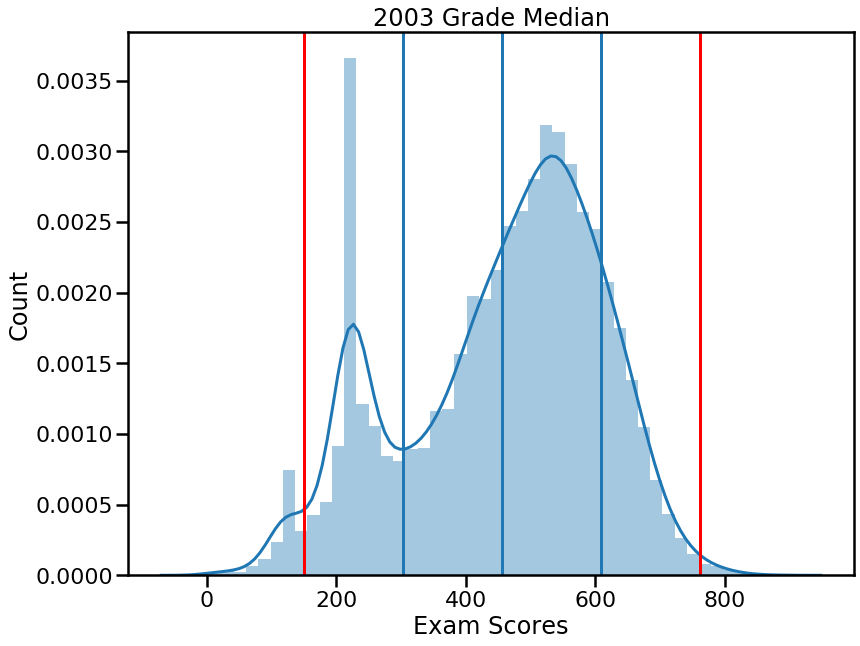

In [18]:
_ = plt.figure(figsize=(13, 10))
_ = sns.distplot(df2003.grade_median)
_ = plt.axvline(np.mean(df2003.grade_median) + np.std(df2003.grade_median))
_ = plt.axvline(np.mean(df2003.grade_median) + 2 * np.std(df2003.grade_median), c='r')
_ = plt.axvline(np.mean(df2003.grade_median) - np.std(df2003.grade_median))
_ = plt.axvline(np.mean(df2003.grade_median) - 2 * np.std(df2003.grade_median), c='r')
_ = plt.axvline(np.mean(df2003.grade_median))
_ = plt.title('2003 Grade Median')
_ = plt.xlabel('Exam Scores')
_ = plt.ylabel('Count')

### I address this set's distributional irregularity in the "Outlines" section below.

5.0     892
8.0     868
7.0     829
6.0     796
9.0     648
4.0     587
10.0    559
3.0     459
2.0     383
1.0     324
Name: teacher_rates_child_how_good_in_studies, dtype: int64

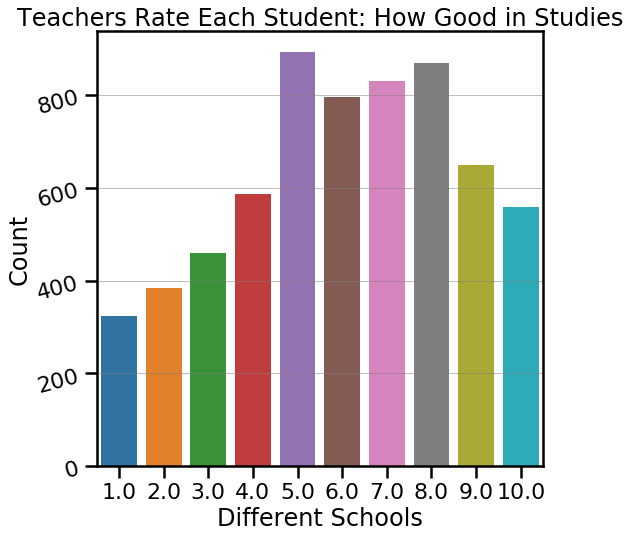

In [19]:
_ = plt.figure(figsize=(8, 8))
_ = sns.countplot(x='teacher_rates_child_how_good_in_studies', data=df2003)
_ = plt.title('Teachers Rate Each Student: How Good in Studies')
_ = plt.xlabel('Different Schools')
_ = plt.ylabel('Count')
_ = plt.yticks(rotation=15)
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

df2003.teacher_rates_child_how_good_in_studies.value_counts()

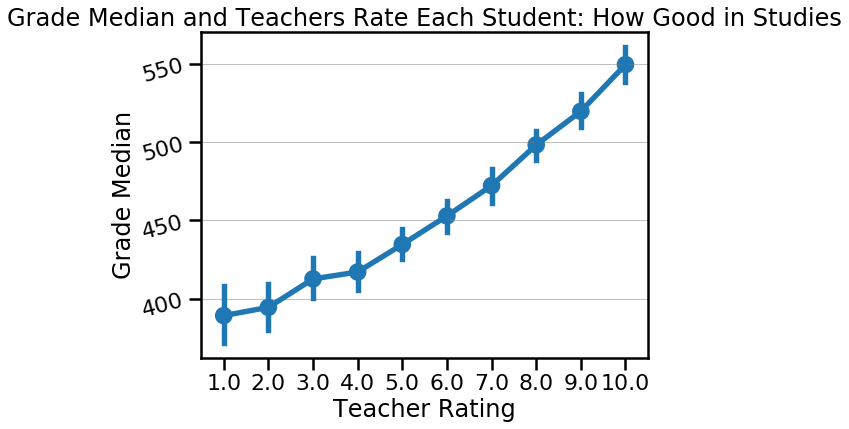

In [20]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='teacher_rates_child_how_good_in_studies', y='grade_median', data=df2003)
_ = plt.title('Grade Median and Teachers Rate Each Student: How Good in Studies')
_ = plt.xlabel('Teacher Rating')
_ = plt.ylabel('Grade Median')
_ = plt.yticks(rotation=15)
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

### One might be reminded of the vast psychological research showing that teacher expectations and beliefs about children often influence their grades, though that is only one factor. E.g., https://www.npr.org/sections/health-shots/2012/09/18/161159263/teachers-expectations-can-influence-how-students-perform

12110

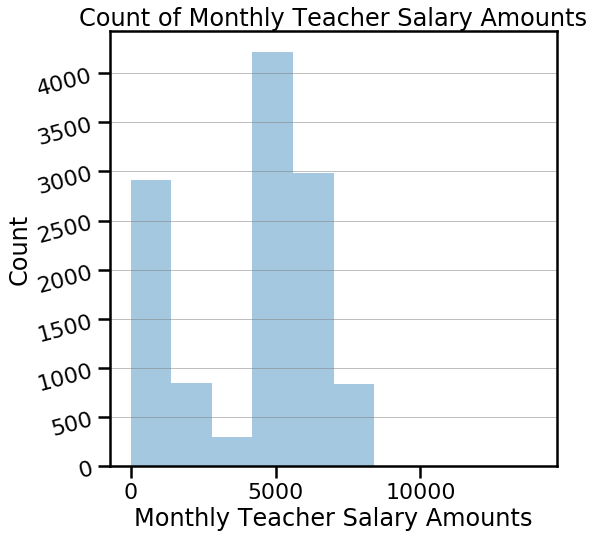

In [21]:
_ = plt.figure(figsize=(8, 8))
_ = sns.distplot(df2003['salary_monthly_Rs'], bins=10, kde=False)
_ = plt.title('Count of Monthly Teacher Salary Amounts')
_ = plt.xlabel('Monthly Teacher Salary Amounts')
_ = plt.ylabel('Count')
_ = plt.yticks(rotation=15)
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

df2003.salary_monthly_Rs.count()

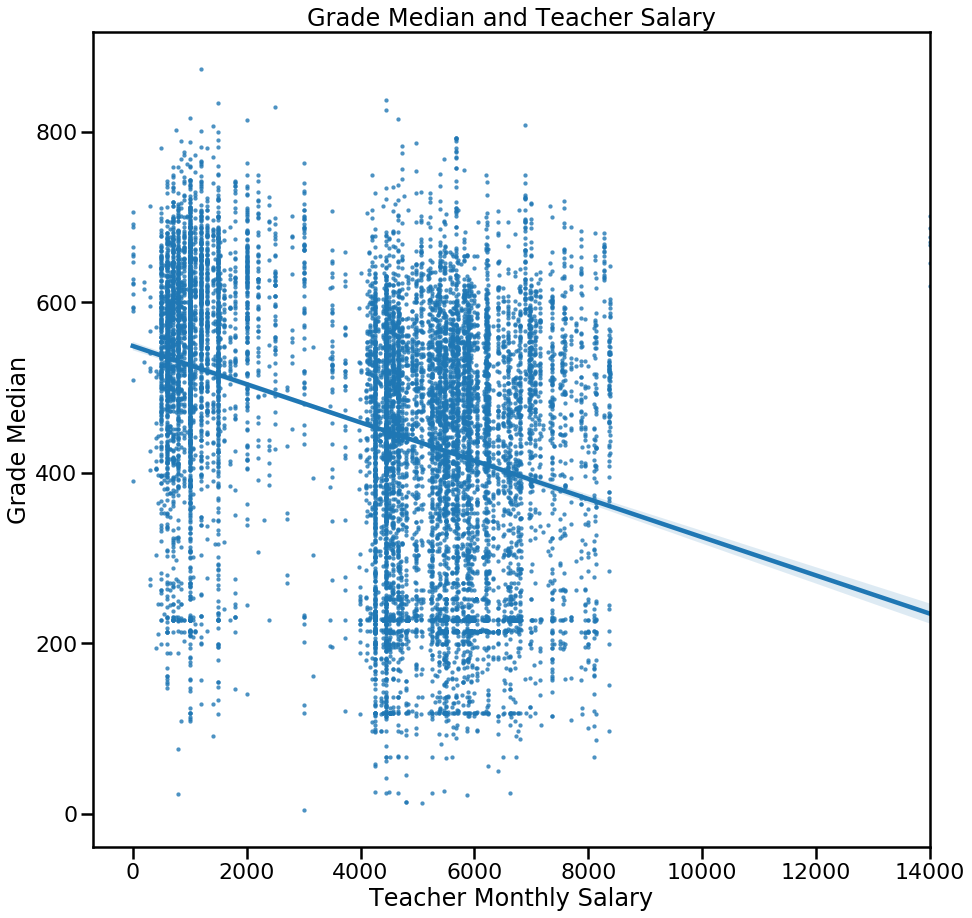

In [22]:
_ = plt.figure(figsize=(15, 15))
_ = sns.regplot(x='salary_monthly_Rs', y='grade_median', data=df2003,scatter_kws={'s':17, 'linewidth':.1})
_ = plt.title('Grade Median and Teacher Salary')
_ = plt.xlabel('Teacher Monthly Salary')
_ = plt.ylabel('Grade Median')

### If there is a meaningful correlation between teacher salaries and student success as measured by grade median, it is negative.

No     4717
Yes    1641
Name: child_studied_at_diff_school, dtype: int64

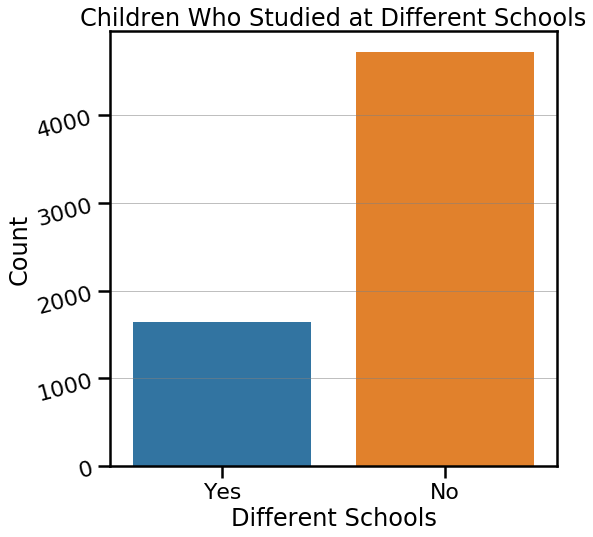

In [23]:
_ = plt.figure(figsize=(8, 8))
_ = sns.countplot(x='child_studied_at_diff_school', data=df2003)
_ = plt.title('Children Who Studied at Different Schools')
_ = plt.xlabel('Different Schools')
_ = plt.ylabel('Count')
_ = plt.yticks(rotation=15)
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

df2003.child_studied_at_diff_school.value_counts()

### Those who changed schools tended to perform better.

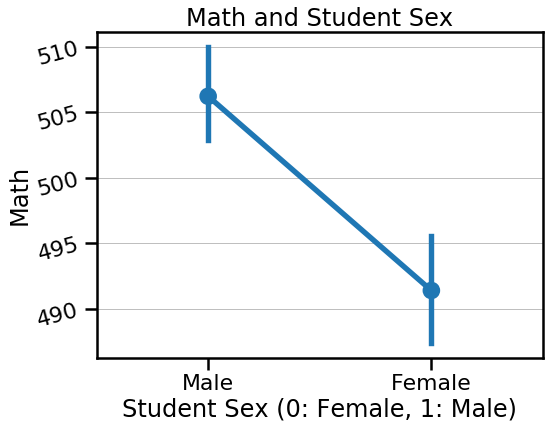

In [24]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='student_sex', y='math', data=df2003)
_ = plt.title('Math and Student Sex')
_ = plt.xlabel('Student Sex (0: Female, 1: Male)')
_ = plt.ylabel('Math')
_ = plt.yticks(rotation=15)
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

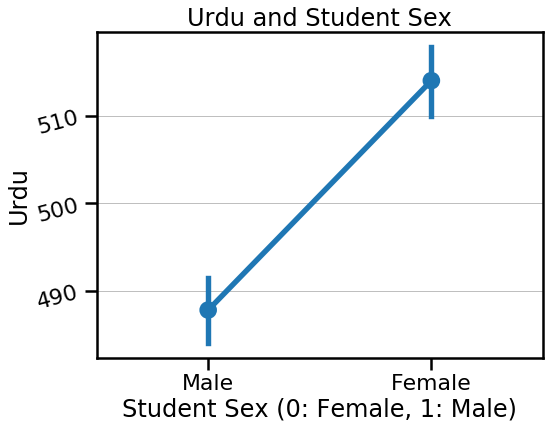

In [25]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='student_sex', y='urdu', data=df2003)
_ = plt.title('Urdu and Student Sex')
_ = plt.xlabel('Student Sex (0: Female, 1: Male)')
_ = plt.ylabel('Urdu')
_ = plt.yticks(rotation=15)
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

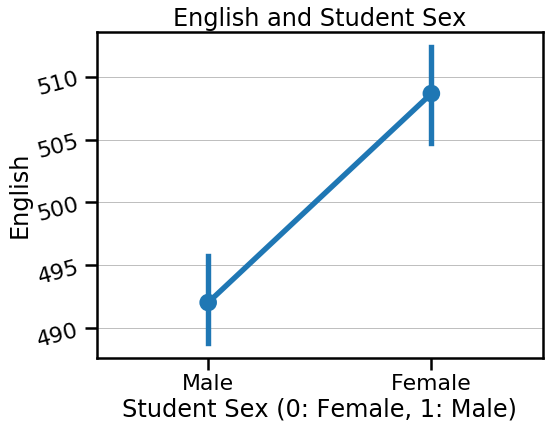

In [26]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='student_sex', y='english', data=df2003)
_ = plt.title('English and Student Sex')
_ = plt.xlabel('Student Sex (0: Female, 1: Male)')
_ = plt.ylabel('English')
_ = plt.yticks(rotation=15)
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

### In the aggregate, males perform better in math, while females perform better in Urdu and English.

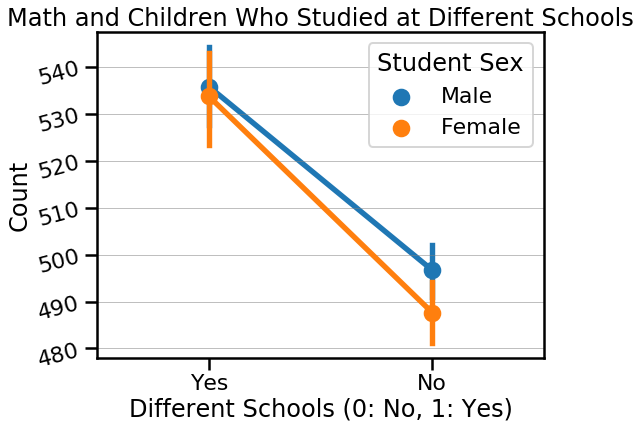

In [27]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='child_studied_at_diff_school', y='math', hue='student_sex', data=df2003)
_ = plt.title('Math and Children Who Studied at Different Schools')
_ = plt.xlabel('Different Schools (0: No, 1: Yes)')
_ = plt.ylabel('Count')
_ = plt.yticks(rotation=15)
_ = plt.legend(title='Student Sex')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

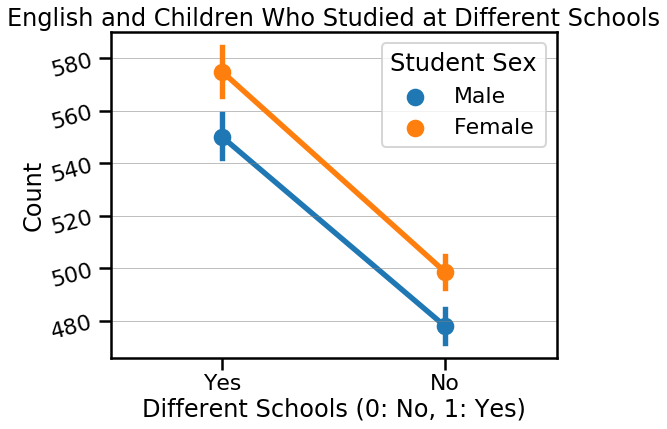

In [28]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='child_studied_at_diff_school', y='english', hue='student_sex', data=df2003)
_ = plt.title('English and Children Who Studied at Different Schools')
_ = plt.xlabel('Different Schools (0: No, 1: Yes)')
_ = plt.ylabel('Count')
_ = plt.yticks(rotation=15)
_ = plt.legend(title='Student Sex')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

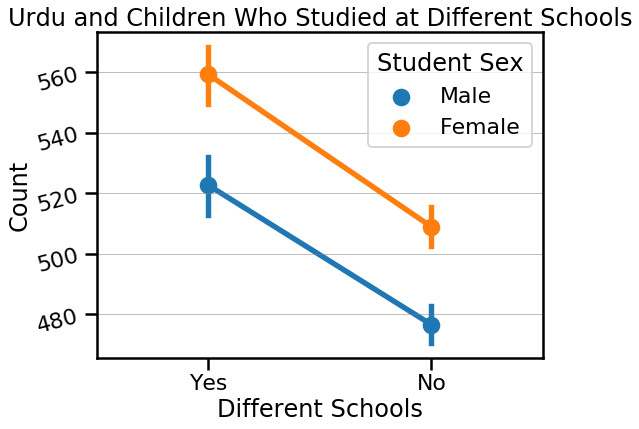

In [29]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='child_studied_at_diff_school', y='urdu', hue='student_sex', data=df2003)
_ = plt.title('Urdu and Children Who Studied at Different Schools')
_ = plt.xlabel('Different Schools')
_ = plt.ylabel('Count')
_ = plt.yticks(rotation=15)
_ = plt.legend(title='Student Sex')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

### A change in school seems almost to have closed the gender gap in math scores but not in Urdu or English.

Yes    465
No     449
Name: own_agri_land_last_2_seasons, dtype: int64

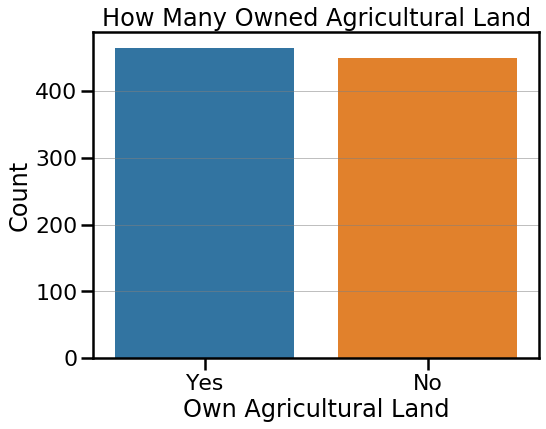

In [30]:
_ = plt.figure(figsize=(8, 6))
_ = sns.countplot(x='own_agri_land_last_2_seasons', data=df2003)
_ = plt.title('How Many Owned Agricultural Land')
_ = plt.xlabel('Own Agricultural Land')
_ = plt.ylabel('Count')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

df2003.own_agri_land_last_2_seasons.value_counts()

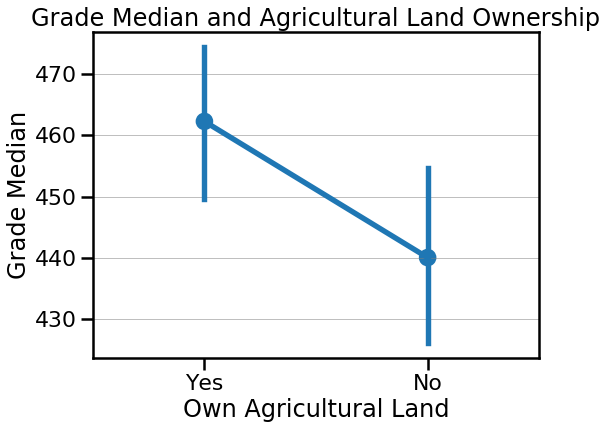

In [31]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='own_agri_land_last_2_seasons', y='grade_median', data=df2003)
_ = plt.title('Grade Median and Agricultural Land Ownership')
_ = plt.xlabel('Own Agricultural Land')
_ = plt.ylabel('Grade Median')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

### About half of those surveyed owned agricultural land, and those with such ownership performed better overall by about 20 points out of 1000, or 1/50.
### The above point plot is made more interesting when one considers that one yearly income and how rich a mauza (area) in which one lives did not significantly affect test scores. Owning agricultural land seems independent of any financial aspect in a household when considering test scores.

No     831
Yes     86
Name: print_have, dtype: int64

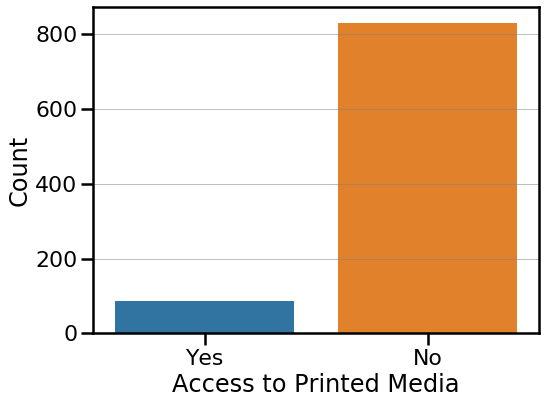

In [32]:
_ = plt.figure(figsize=(8, 6))
_ = sns.countplot(x='print_have', data=df2003)
_ = plt.xlabel('Access to Printed Media')
_ = plt.ylabel('Count')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

df2003.print_have.value_counts()

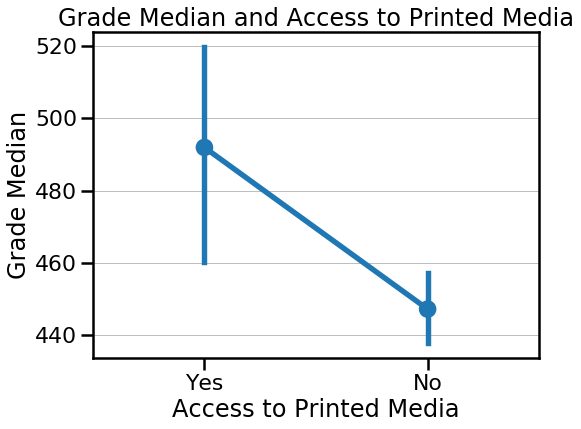

In [33]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='print_have', y='grade_median', data=df2003)
_ = plt.title('Grade Median and Access to Printed Media')
_ = plt.xlabel('Access to Printed Media')
_ = plt.ylabel('Grade Median')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

### Few have access to printed media, and there seems to be a slight, positive correlation between that and grade median.

### Teacher Factors: Educational Qualifications, Sex, Years Teaching, Teacher from Mauza (area)

Matric           5205
F.A./F.SC        3643
B.A./B.SC        2497
M.A. or above     707
<Matric            58
Name: teacher_qualifications, dtype: int64

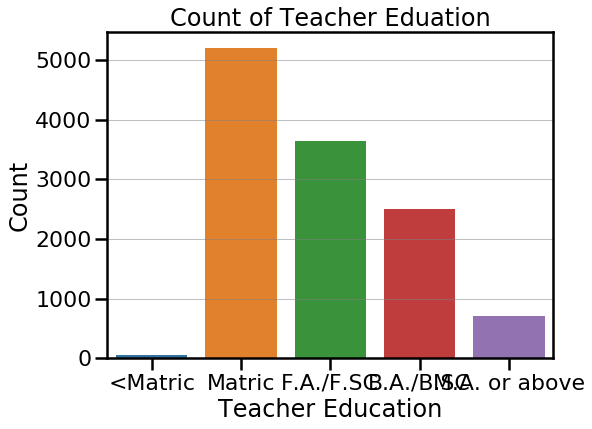

In [34]:
_ = plt.figure(figsize=(8, 6))
_ = sns.countplot(x='teacher_qualifications', data=df2003)
_ = plt.title('Count of Teacher Eduation')
_ = plt.xlabel('Teacher Education')
_ = plt.ylabel('Count')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

df2003.teacher_qualifications.value_counts()

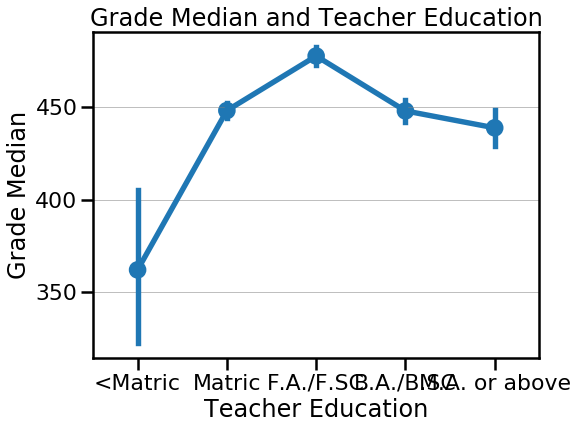

In [35]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='teacher_qualifications', y='grade_median',
                  data=df2003)
_ = plt.title('Grade Median and Teacher Education')
_ = plt.xlabel('Teacher Education')
_ = plt.ylabel('Grade Median')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

### The technically less qualified "F.A./F.SC" has significantly higher test scores than those with a B.A. or M.A.

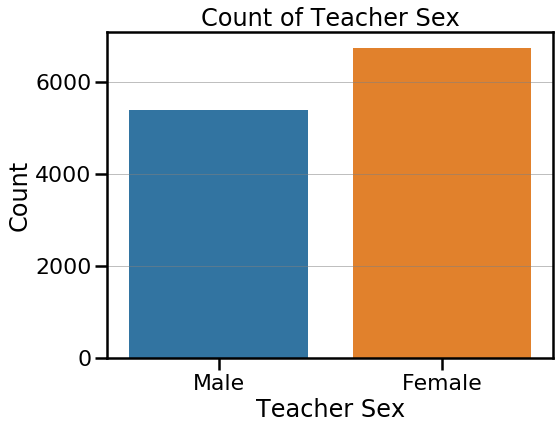

In [36]:
_ = plt.figure(figsize=(8, 6))
_ = sns.countplot(x='teacher_sex', data=df2003)
_ = plt.title('Count of Teacher Sex')
_ = plt.xlabel('Teacher Sex')
_ = plt.ylabel('Count')

df2003.teacher_sex.value_counts()
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

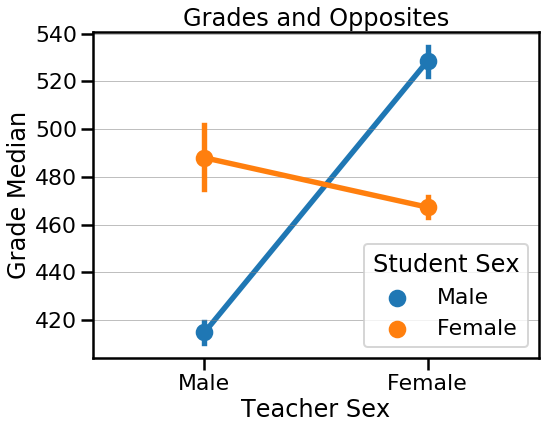

In [37]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='teacher_sex', y='grade_median',
                  data=df2003, hue='student_sex')
_ = plt.title('Grades and Opposites')
_ = plt.xlabel('Teacher Sex')
_ = plt.ylabel('Grade Median')
_ = plt.legend(title='Student Sex')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

### Males performed better when taught by female teachers and vice versa, though it is stronger for males.

> 3 Years    8928
1-3 Years    1935
< 1 Year     1247
Name: teacher_years_teaching, dtype: int64

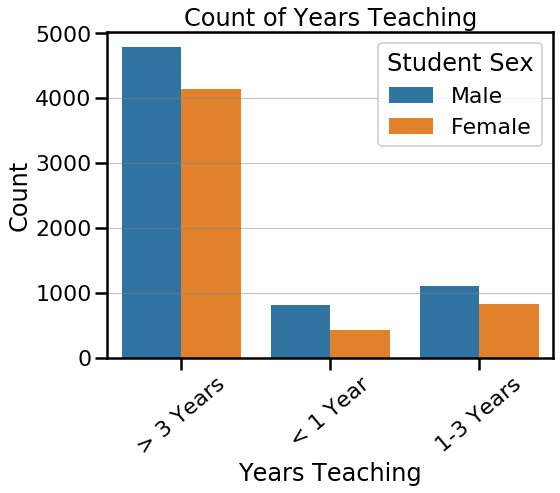

In [38]:
_ = plt.figure(figsize=(8, 6))
_ = sns.countplot(x='teacher_years_teaching', hue='student_sex',
                  data=df2003)
_ = plt.title('Count of Years Teaching')
_ = plt.xlabel('Years Teaching')
_ = plt.xticks(rotation=40)
_ = plt.ylabel('Count')
_ = plt.legend(title='Student Sex')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

df2003.teacher_years_teaching.value_counts()

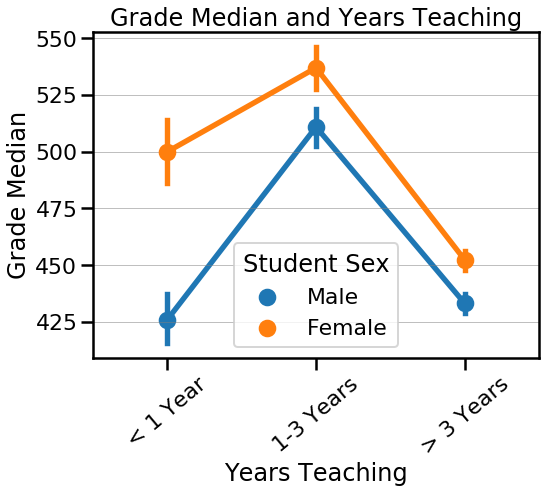

In [39]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='teacher_years_teaching', y='grade_median',
                  data=df2003, hue='student_sex', order=['< 1 Year', '1-3 Years', '> 3 Years'])
_ = plt.title('Grade Median and Years Teaching')
_ = plt.xlabel('Years Teaching')
_ = plt.xticks(rotation=40)
_ = plt.ylabel('Grade Median')
_ = plt.legend(title='Student Sex')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

### Surprisingly, though there is not enough data on teachers who have taught for less than one year, teachers with the most experience have the lowest grades. Whatever explanation is put forward, it must consider the overwhelming amount of teachers with more than 3 years of teaching.

No     7763
Yes    4347
Name: teacher_from_mauza, dtype: int64

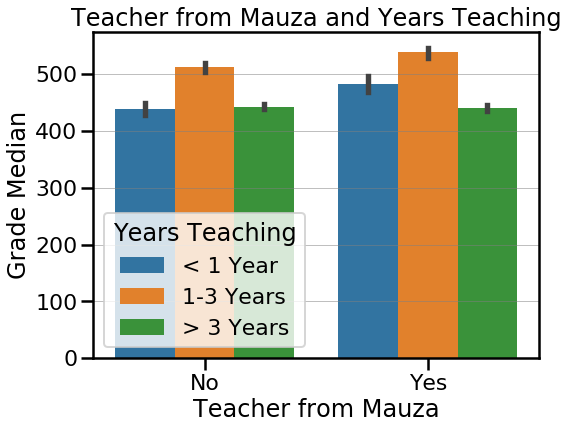

In [40]:
_ = plt.figure(figsize=(8, 6))
_ = sns.barplot(x='teacher_from_mauza', y='grade_median',
                  data=df2003, hue='teacher_years_teaching',
                   hue_order=['< 1 Year', '1-3 Years', '> 3 Years'])
_ = plt.title('Teacher from Mauza and Years Teaching')
_ = plt.xlabel('Teacher from Mauza')
_ = plt.ylabel('Grade Median')
_ = plt.legend(title='Years Teaching')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

df2003.teacher_from_mauza.value_counts()

No     7763
Yes    4347
Name: teacher_from_mauza, dtype: int64

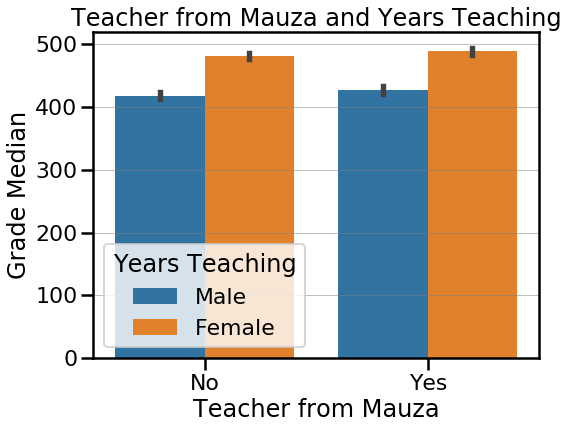

In [41]:
_ = plt.figure(figsize=(8, 6))
_ = sns.barplot(x='teacher_from_mauza', y='grade_median',
                  data=df2003, hue='teacher_sex')
_ = plt.title('Teacher from Mauza and Years Teaching')
_ = plt.xlabel('Teacher from Mauza')
_ = plt.ylabel('Grade Median')
_ = plt.legend(title='Years Teaching')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

df2003.teacher_from_mauza.value_counts()

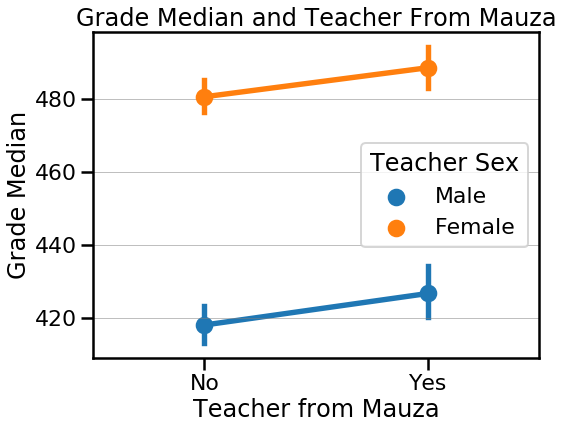

In [42]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='teacher_from_mauza', y='grade_median',
                  data=df2003, hue='teacher_sex')
_ = plt.title('Grade Median and Teacher From Mauza')
_ = plt.xlabel('Teacher from Mauza')
_ = plt.ylabel('Grade Median')
_ = plt.legend(title='Teacher Sex')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

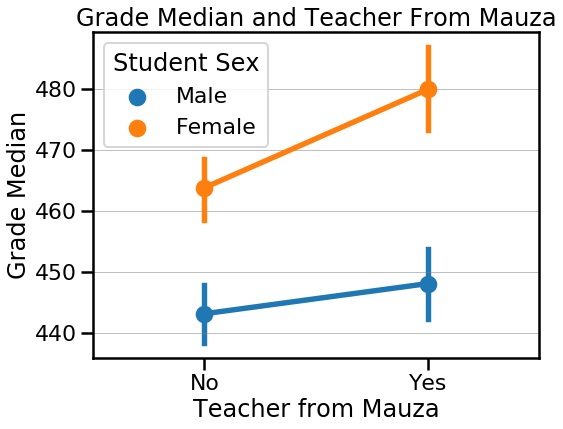

In [43]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='teacher_from_mauza', y='grade_median',
                  data=df2003, hue='student_sex')
_ = plt.title('Grade Median and Teacher From Mauza')
_ = plt.xlabel('Teacher from Mauza')
_ = plt.ylabel('Grade Median')
_ = plt.legend(title='Student Sex')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

### Female teachers who remain in their mauza of being raised have higher scoring female students than male students.
### Female students benefit more from a teacher remaining in a mauza than male students.

## 2004

In [44]:
df2004.head(3)

,grade_median,childcode,hhid,teachercode,child_teachercode,student_sex,english,math,urdu,grade,...,teacher_survey_absent_other_work,teacher_years_teaching,teacher_training,teacher_qualifications,teacher_from_mauza,child_studied_at_diff_school,radio,television,child_days_absent_last_mo,teacher_rates_child_how_good_in_studies
0,620.0,101001,NaN,10103.0,10103.0,0.0,716.0,620.0,611.0,4.0,...,Yes,< 1 Year,No training,FA/FSc,Yes,No,Yes,No,NaN,NaN
1,725.0,101002,NaN,10205.0,10103.0,0.0,743.0,725.0,637.0,4.0,...,No,> 3 Years,PTC/JV/SV,Matric,Yes,No,Yes,Yes,0.0,5.0
2,630.0,101003,NaN,10351.0,10103.0,1.0,726.0,630.0,645.0,4.0,...,No,< 1 Year,No training,Matric,Yes,No,Yes,Yes,0.0,6.0


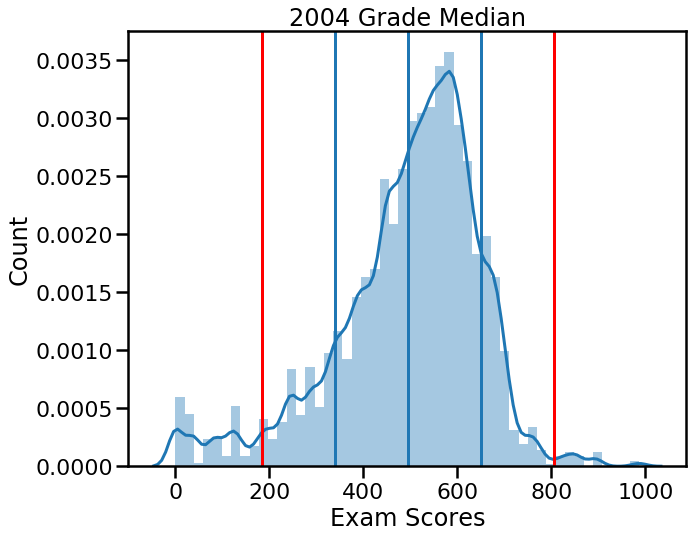

In [45]:
_ = plt.figure(figsize=(10, 8))
_ = sns.distplot(df2004.grade_median)
_ = plt.axvline(np.mean(df2004.grade_median) + np.std(df2004.grade_median))
_ = plt.axvline(np.mean(df2004.grade_median) + 2 * np.std(df2004.grade_median), c='r')
_ = plt.axvline(np.mean(df2004.grade_median) - np.std(df2004.grade_median))
_ = plt.axvline(np.mean(df2004.grade_median) - 2 * np.std(df2004.grade_median), c='r')
_ = plt.axvline(np.mean(df2004.grade_median))
_ = plt.title('2004 Grade Median')
_ = plt.xlabel('Exam Scores')
_ = plt.ylabel('Count')

22.0    23438
11.0    15293
16.0    13576
Name: supervisor_code, dtype: int64

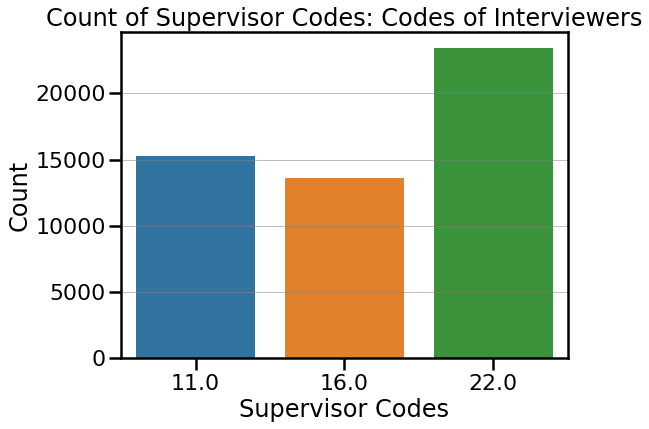

In [46]:
_ = plt.figure(figsize=(8, 6))
_ = sns.countplot(x='supervisor_code', data=df2004)
_ = plt.title('Count of Supervisor Codes: Codes of Interviewers')
_ = plt.xlabel('Supervisor Codes')
_ = plt.ylabel('Count')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

df2004.supervisor_code.value_counts()

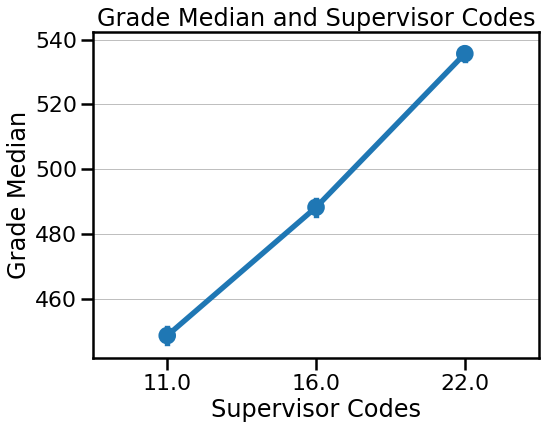

In [47]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='supervisor_code', y='grade_median', data=df2004)
_ = plt.title('Grade Median and Supervisor Codes')
_ = plt.xlabel('Supervisor Codes')
_ = plt.ylabel('Grade Median')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

### There is somehow a significant correlation between the code of supervisors and the grade median. This may be related to how the data was gathered.

No           42097
No Answer    11948
Yes          10173
Name: hh_child_in_govt_primary_school, dtype: int64

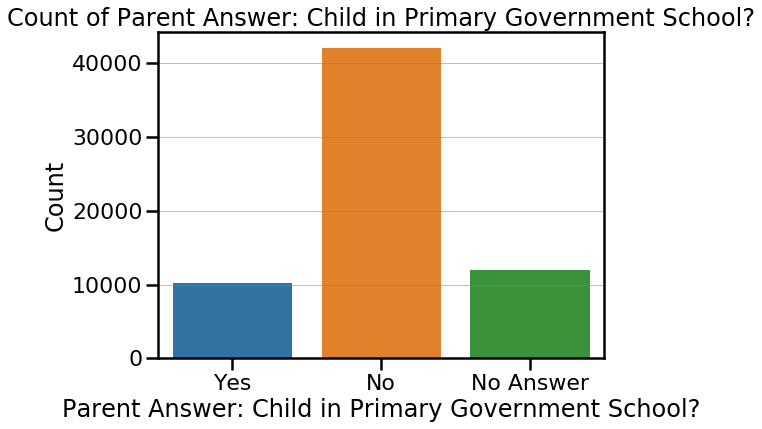

In [48]:
# Convert 1.0 and 2.0 to No and Yes, respectively.
df2004_govt = df2004.copy()
df2004_govt.hh_child_in_govt_primary_school = df2004_govt.hh_child_in_govt_primary_school.fillna(55.0)
num_to_yes_no = {1.0: 'No', 2.0: 'Yes', 55.0: 'No Answer'}
df2004_govt.hh_child_in_govt_primary_school = [num_to_yes_no[item] for item in df2004_govt.hh_child_in_govt_primary_school]

_ = plt.figure(figsize=(8, 6))
_ = sns.countplot(x='hh_child_in_govt_primary_school', data=df2004_govt,
                 order = ['Yes', 'No', 'No Answer'])
_ = plt.title('Count of Parent Answer: Child in Primary Government School?')
_ = plt.xlabel('Parent Answer: Child in Primary Government School?')
_ = plt.ylabel('Count')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

df2004_govt.hh_child_in_govt_primary_school.value_counts()

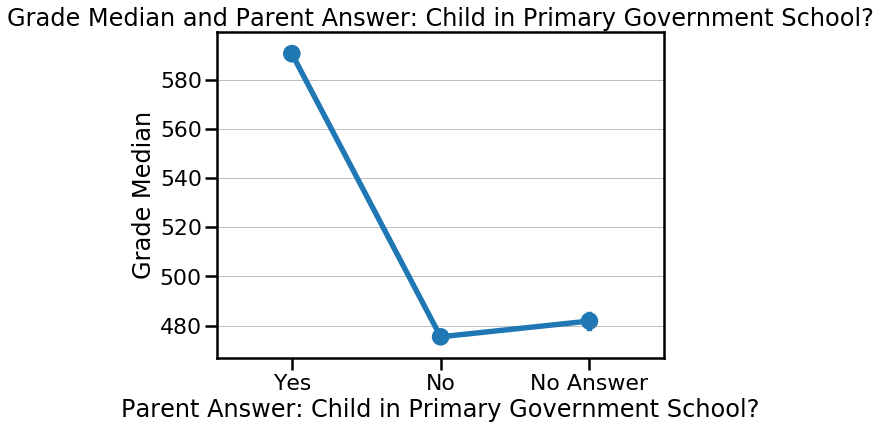

In [49]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='hh_child_in_govt_primary_school', y='grade_median', data=df2004_govt,
                 order = ['Yes', 'No', 'No Answer'])
_ = plt.title('Grade Median and Parent Answer: Child in Primary Government School?')
_ = plt.xlabel('Parent Answer: Child in Primary Government School?')
_ = plt.ylabel('Grade Median')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

3711.0    8615
3133.0    8565
3313.0    6130
3134.0    5203
3132.0    4961
3131.0    4576
3314.0    3654
3315.0    3442
3712.0    3406
3714.0    2052
3715.0    1060
3311.0     276
3316.0     207
3713.0     160
Name: tehsil_census_code, dtype: int64

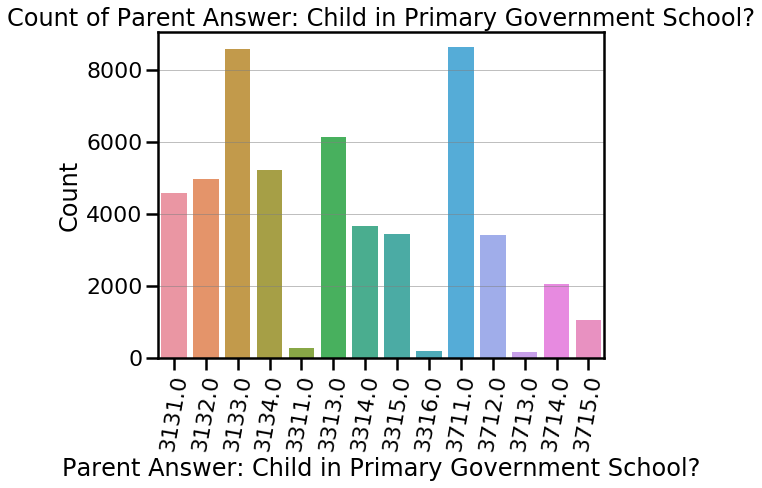

In [50]:
_ = plt.figure(figsize=(8, 6))
_ = sns.countplot(x='tehsil_census_code', data=df2004)
_ = plt.title('Count of Parent Answer: Child in Primary Government School?')
_ = plt.xticks(rotation=80)
_ = plt.xlabel('Parent Answer: Child in Primary Government School?')
_ = plt.ylabel('Count')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

df2004.tehsil_census_code.value_counts()

In [51]:
'''_ = plt.figure(figsize=(8, 6))
s = df2004['tehsil_census_code'].where(df2004['tehsil_census_code'].value_counts() > 300)

_ = sns.pointplot(x=s, y='grade_median', data=df2004)
_ = plt.xlabel('Tehsil Census Code')
_ = plt.xticks(rotation=70)
_ = plt.ylabel('Grade Median')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')'''

"_ = plt.figure(figsize=(8, 6))\ns = df2004['tehsil_census_code'].where(df2004['tehsil_census_code'].value_counts() > 300)\n\n_ = sns.pointplot(x=s, y='grade_median', data=df2004)\n_ = plt.xlabel('Tehsil Census Code')\n_ = plt.xticks(rotation=70)\n_ = plt.ylabel('Grade Median')\n_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')"

English             855
Math                229
Urdu                 81
Islimaiyat/Quran     54
Science Subjects     48
Name: child_helped, dtype: int64

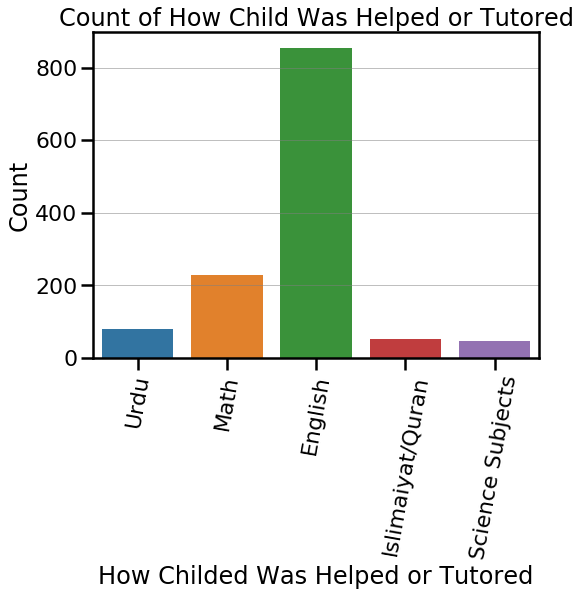

In [52]:
_ = plt.figure(figsize=(8, 6))
_ = sns.countplot(x='child_helped', data=df2004)
_ = plt.title('Count of How Child Was Helped or Tutored')
_ = plt.xticks(rotation=80)
_ = plt.xlabel('How Childed Was Helped or Tutored')
_ = plt.ylabel('Count')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

df2004.child_helped.value_counts()

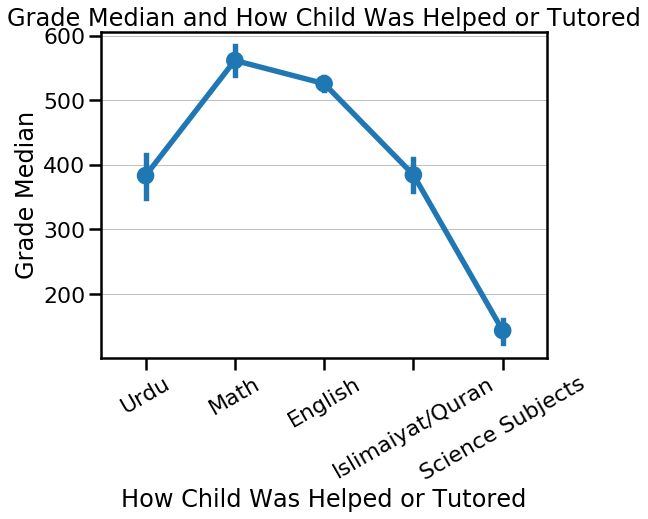

In [53]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='child_helped', y='grade_median', data=df2004)
_ = plt.title('Grade Median and How Child Was Helped or Tutored')
_ = plt.xlabel('How Child Was Helped or Tutored')
_ = plt.xticks(rotation=30)
_ = plt.ylabel('Grade Median')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

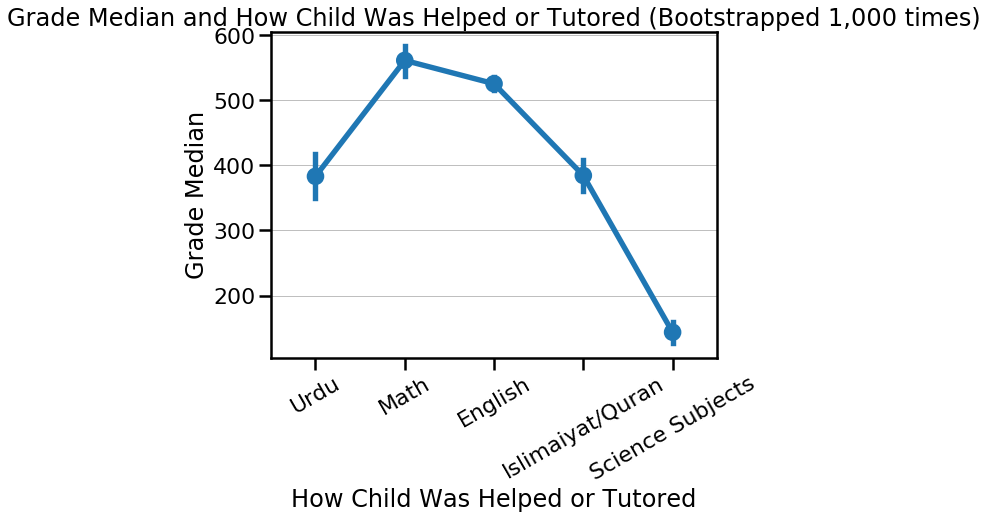

In [54]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='child_helped', y='grade_median', data=df2004, n_boot=1000)
_ = plt.title('Grade Median and How Child Was Helped or Tutored (Bootstrapped 1,000 times)')
_ = plt.xlabel('How Child Was Helped or Tutored')
_ = plt.xticks(rotation=30)
_ = plt.ylabel('Grade Median')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

### There is only enough data to show that English and Math tutoring are helpful, though all but science look promising.

English             855
Math                229
Urdu                 81
Islimaiyat/Quran     54
Science Subjects     48
Name: child_helped, dtype: int64

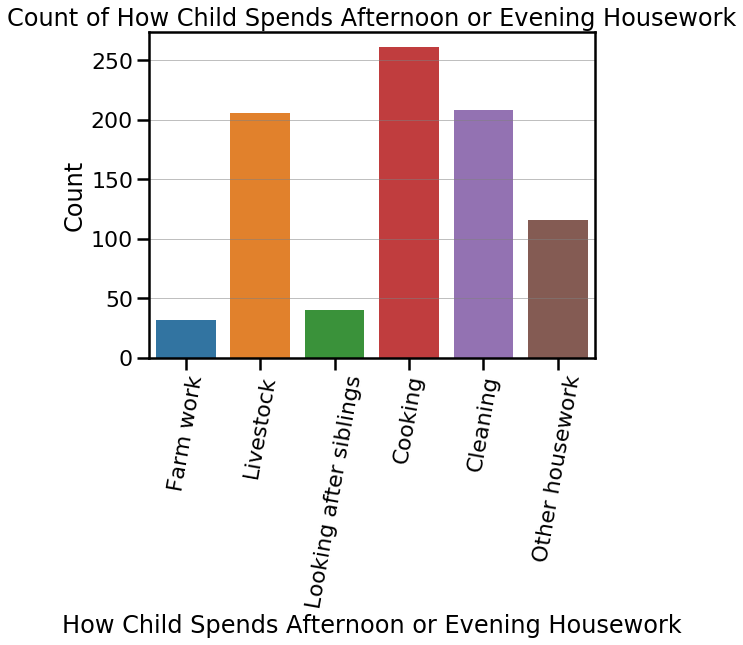

In [55]:
_ = plt.figure(figsize=(8, 6))
_ = sns.countplot(x='type_of_housework_timeslot_5', data=df2004)
_ = plt.title('Count of How Child Spends Afternoon or Evening Housework')
_ = plt.xticks(rotation=80)
_ = plt.xlabel('How Child Spends Afternoon or Evening Housework')
_ = plt.ylabel('Count')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

df2004.child_helped.value_counts()

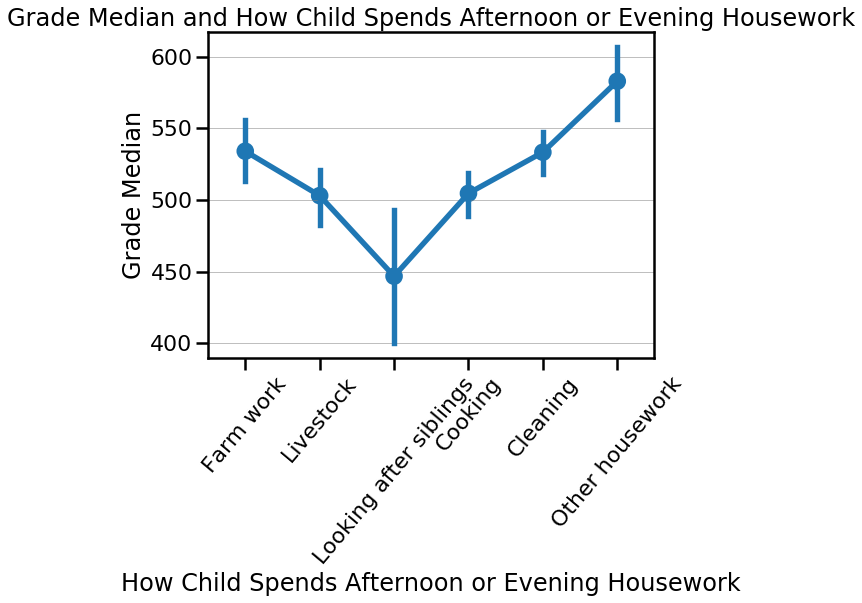

In [56]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='type_of_housework_timeslot_5', y='grade_median', data=df2004)
_ = plt.title('Grade Median and How Child Spends Afternoon or Evening Housework')
_ = plt.xlabel('How Child Spends Afternoon or Evening Housework')
_ = plt.xticks(rotation=50)
_ = plt.ylabel('Grade Median')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

7.0     6878
8.0     6866
5.0     6725
9.0     5291
6.0     4945
4.0     4196
10.0    3439
3.0     2218
2.0     1844
1.0     1445
0.0      685
Name: teacher_rates_child_how_good_in_studies, dtype: int64

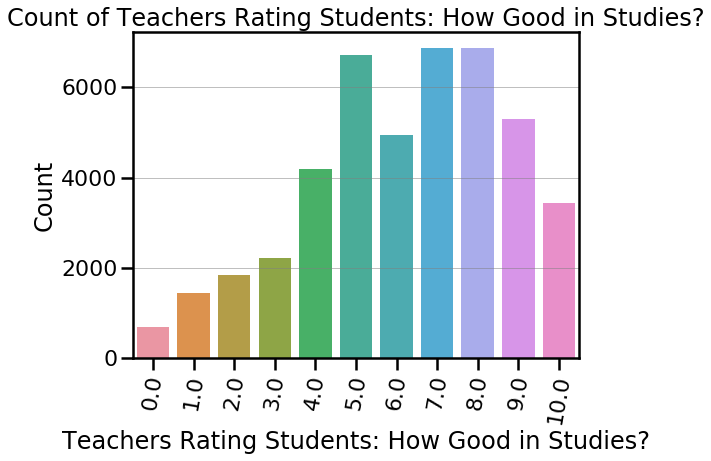

In [57]:
_ = plt.figure(figsize=(8, 6))
_ = sns.countplot(x='teacher_rates_child_how_good_in_studies', data=df2004)
_ = plt.title('Count of Teachers Rating Students: How Good in Studies?')
_ = plt.xticks(rotation=80)
_ = plt.xlabel('Teachers Rating Students: How Good in Studies?')
_ = plt.ylabel('Count')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

df2004.teacher_rates_child_how_good_in_studies.value_counts()

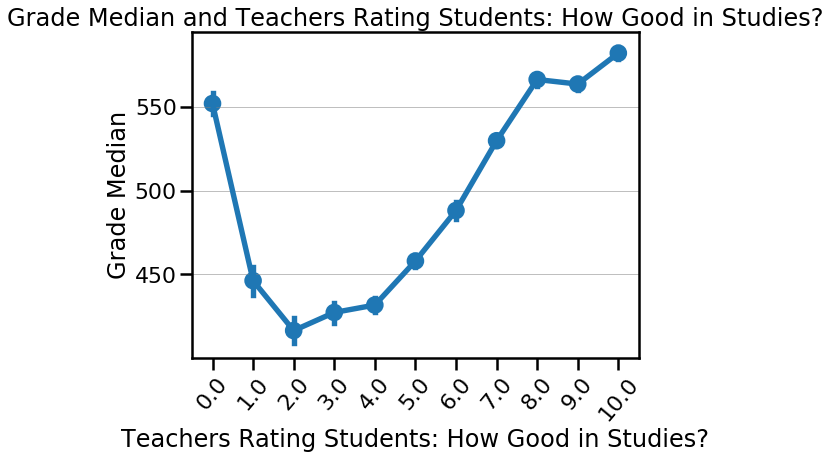

In [58]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='teacher_rates_child_how_good_in_studies', y='grade_median', data=df2004)
_ = plt.title('Grade Median and Teachers Rating Students: How Good in Studies?')
_ = plt.xlabel('Teachers Rating Students: How Good in Studies?')
_ = plt.xticks(rotation=50)
_ = plt.ylabel('Grade Median')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

### Aside from the odd peak with 689 students who were rated at bottom, this holds with the 2003 dataset.

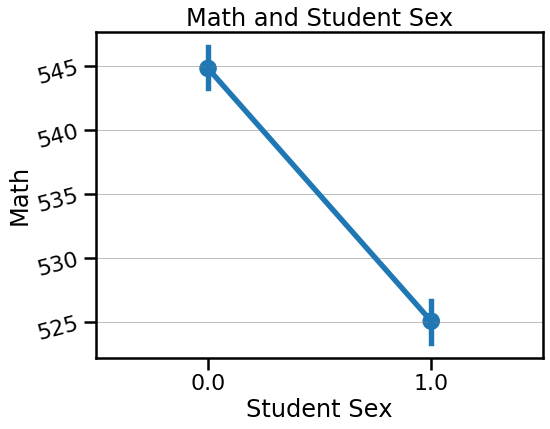

In [59]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='student_sex', y='math', data=df2004)
_ = plt.title('Math and Student Sex')
_ = plt.xlabel('Student Sex')
_ = plt.ylabel('Math')
_ = plt.yticks(rotation=15)
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

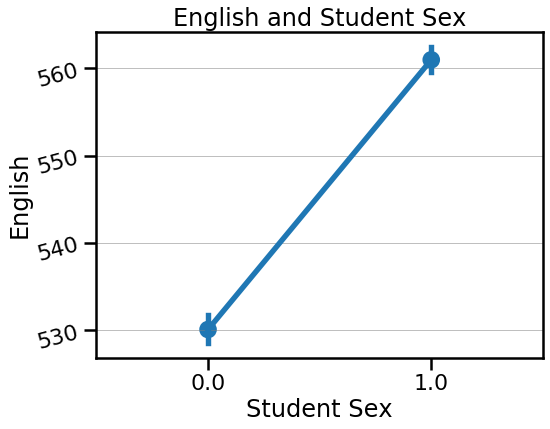

In [60]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='student_sex', y='english', data=df2004)
_ = plt.title('English and Student Sex')
_ = plt.xlabel('Student Sex')
_ = plt.ylabel('English')
_ = plt.yticks(rotation=15)
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

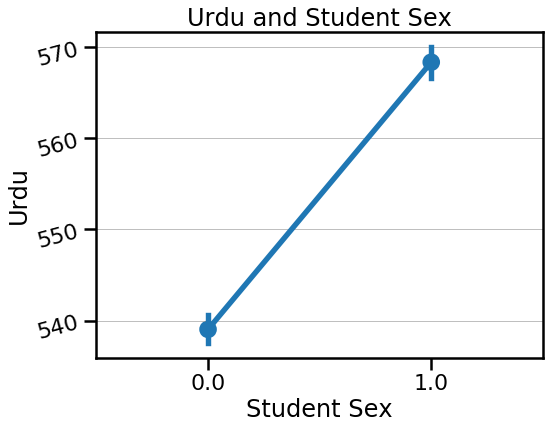

In [61]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='student_sex', y='urdu', data=df2004)
_ = plt.title('Urdu and Student Sex')
_ = plt.xlabel('Student Sex')
_ = plt.ylabel('Urdu')
_ = plt.yticks(rotation=15)
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

### As in 2003, males perform better in math while females perform better in English and Urdu

Yes    18399
No       972
Name: studied_at_same_school_as_last_year, dtype: int64

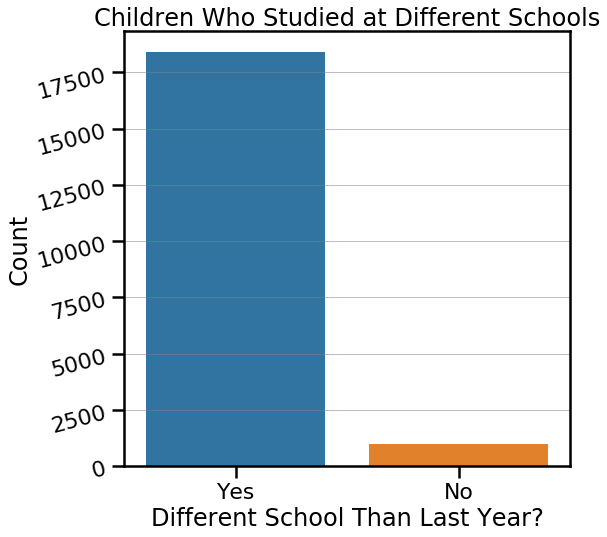

In [62]:
_ = plt.figure(figsize=(8, 8))
_ = sns.countplot(x='studied_at_same_school_as_last_year', data=df2004)
_ = plt.title('Children Who Studied at Different Schools')
_ = plt.xlabel('Different School Than Last Year?')
_ = plt.ylabel('Count')
_ = plt.yticks(rotation=15)
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

df2004.studied_at_same_school_as_last_year.value_counts()

### The 2004 dataset has many more students who have switched schools than the 2003 dataset.

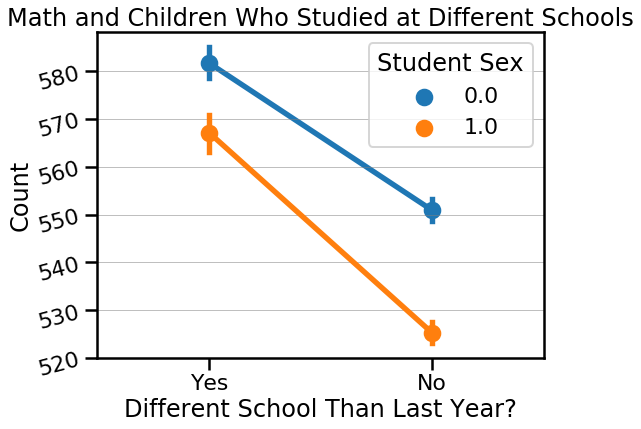

In [63]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='child_studied_at_diff_school', y='math', hue='student_sex', data=df2004)
_ = plt.title('Math and Children Who Studied at Different Schools')
_ = plt.xlabel('Different School Than Last Year?')
_ = plt.ylabel('Count')
_ = plt.yticks(rotation=15)
_ = plt.legend(title='Student Sex')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

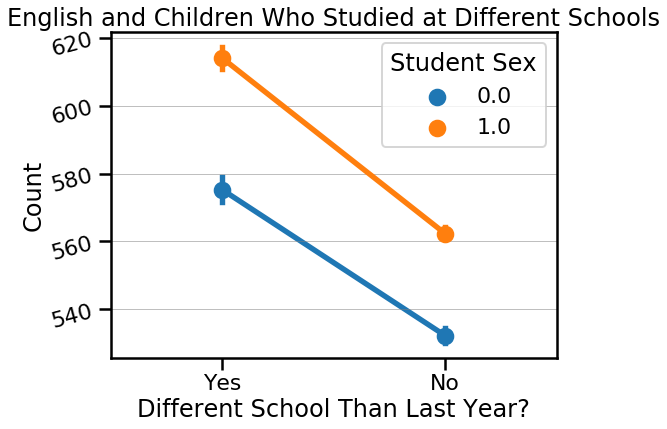

In [64]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='child_studied_at_diff_school', y='english', hue='student_sex', data=df2004)
_ = plt.title('English and Children Who Studied at Different Schools')
_ = plt.xlabel('Different School Than Last Year?')
_ = plt.ylabel('Count')
_ = plt.yticks(rotation=15)
_ = plt.legend(title='Student Sex')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

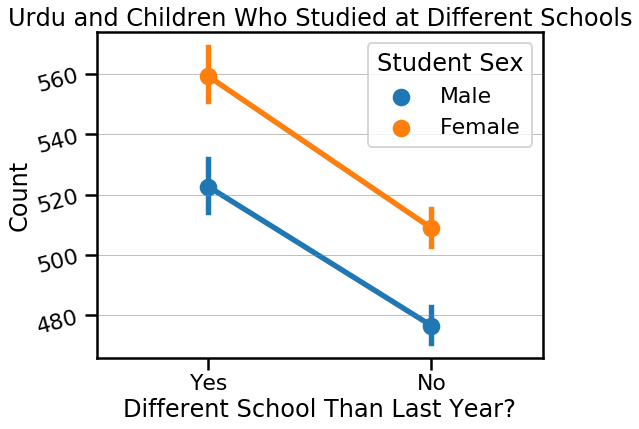

In [65]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='child_studied_at_diff_school', y='urdu', hue='student_sex', data=df2003)
_ = plt.title('Urdu and Children Who Studied at Different Schools')
_ = plt.xlabel('Different School Than Last Year?')
_ = plt.ylabel('Count')
_ = plt.yticks(rotation=15)
_ = plt.legend(title='Student Sex')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

### Unlike in 2003, changing schools does not close the math gap between males and females, though it is still correlated with a significant improvement for both sexes in all subjects.

Yes    28199
No     16230
Name: radio, dtype: int64

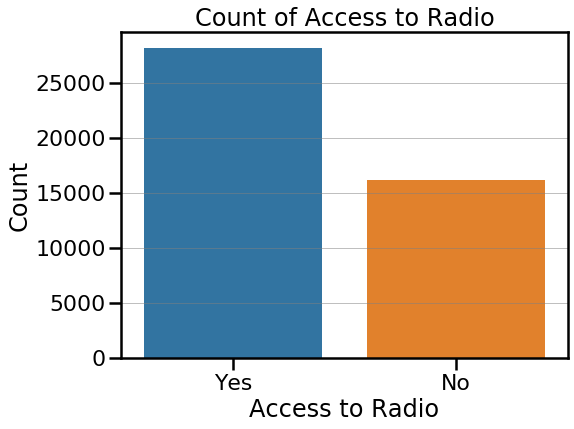

In [66]:
_ = plt.figure(figsize=(8, 6))
_ = sns.countplot(x='radio', data=df2004)
_ = plt.title('Count of Access to Radio')
_ = plt.xlabel('Access to Radio')
_ = plt.ylabel('Count')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

df2004.radio.value_counts()

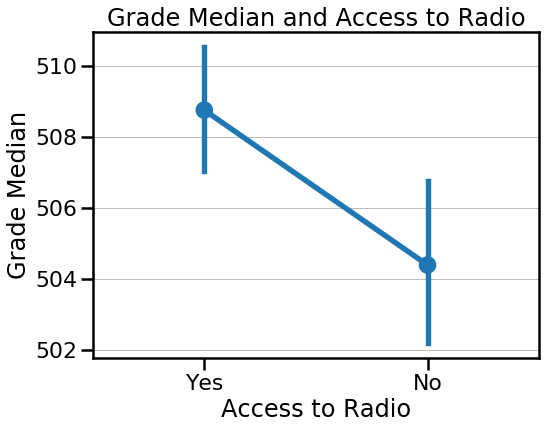

In [67]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='radio', y='grade_median', data=df2004)
_ = plt.title('Grade Median and Access to Radio')
_ = plt.xlabel('Access to Radio')
_ = plt.ylabel('Grade Median')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

Yes    28059
No     16370
Name: television, dtype: int64

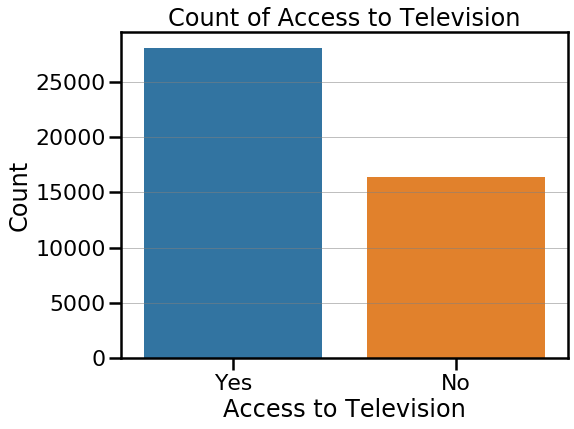

In [68]:
_ = plt.figure(figsize=(8, 6))
_ = sns.countplot(x='television', data=df2004)
_ = plt.title('Count of Access to Television')
_ = plt.xlabel('Access to Television')
_ = plt.ylabel('Count')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

df2004.television.value_counts()

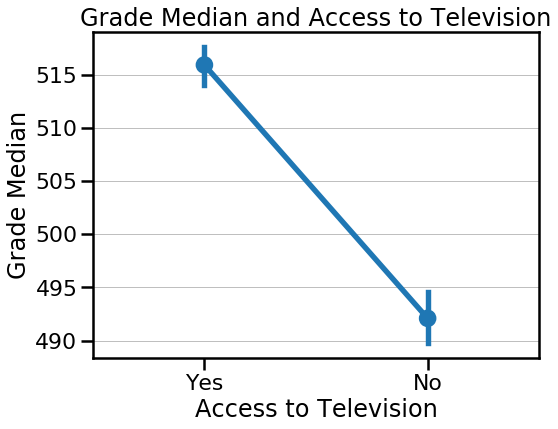

In [69]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='television', y='grade_median', data=df2004)
_ = plt.title('Grade Median and Access to Television')
_ = plt.xlabel('Access to Television')
_ = plt.ylabel('Grade Median')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

### Many do and do not have access to radio and television. Radio hardly has a correlation with the grade median, though television has a significant positive correlation.

### Teacher Factors: Educational Qualifications, Sex, Years Teaching, Teacher from Mauza (area)

Matric           5205
F.A./F.SC        3643
B.A./B.SC        2497
M.A. or above     707
<Matric            58
Name: teacher_qualifications, dtype: int64

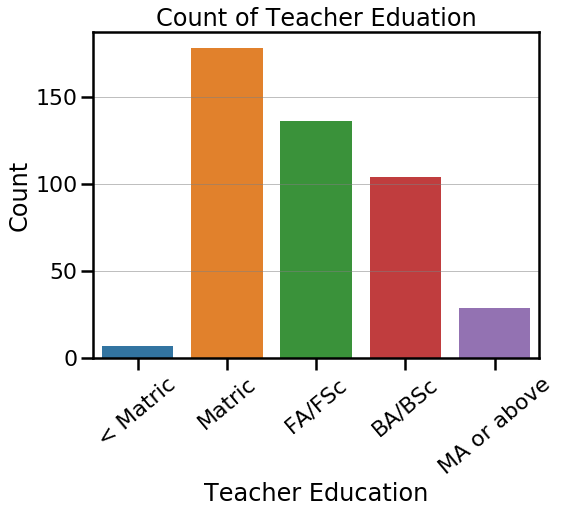

In [70]:
_ = plt.figure(figsize=(8, 6))
_ = sns.countplot(x='teacher_qualifications', data=df2004)
_ = plt.title('Count of Teacher Eduation')
_ = plt.xlabel('Teacher Education')
_ = plt.xticks(rotation=40)
_ = plt.ylabel('Count')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

df2003.teacher_qualifications.value_counts()

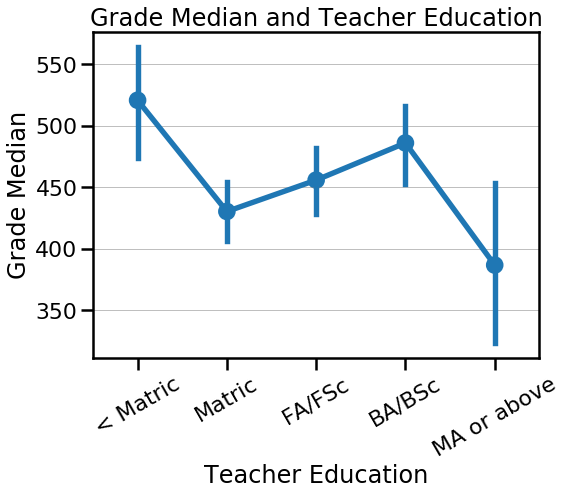

In [71]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='teacher_qualifications', y='grade_median',
                  data=df2004)
_ = plt.title('Grade Median and Teacher Education')
_ = plt.xlabel('Teacher Education')
_ = plt.xticks(rotation=30)
_ = plt.ylabel('Grade Median')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

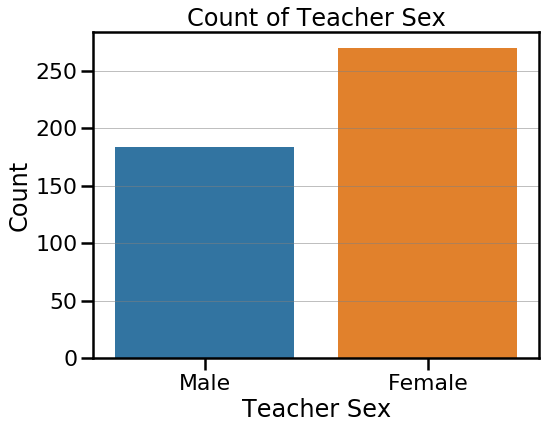

In [72]:
_ = plt.figure(figsize=(8, 6))
_ = sns.countplot(x='teacher_sex', data=df2004)
_ = plt.title('Count of Teacher Sex')
_ = plt.xlabel('Teacher Sex')
_ = plt.ylabel('Count')

df2003.teacher_sex.value_counts()
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

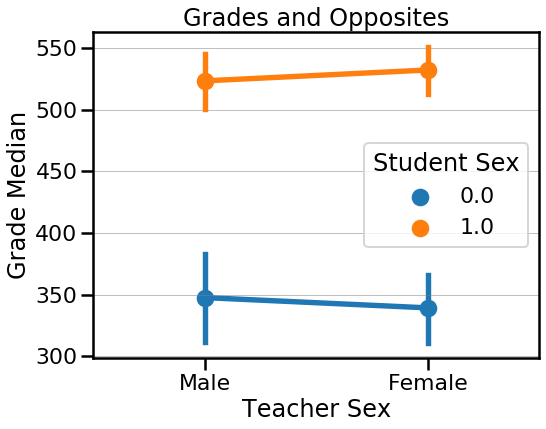

In [73]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='teacher_sex', y='grade_median',
                  data=df2004, hue='student_sex')
_ = plt.title('Grades and Opposites')
_ = plt.xlabel('Teacher Sex')
_ = plt.ylabel('Grade Median')
_ = plt.legend(title='Student Sex')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

### Unlike the data from 2003, there is no correlation between the sex of a student and teacher.

> 3 Years    8928
1-3 Years    1935
< 1 Year     1247
Name: teacher_years_teaching, dtype: int64

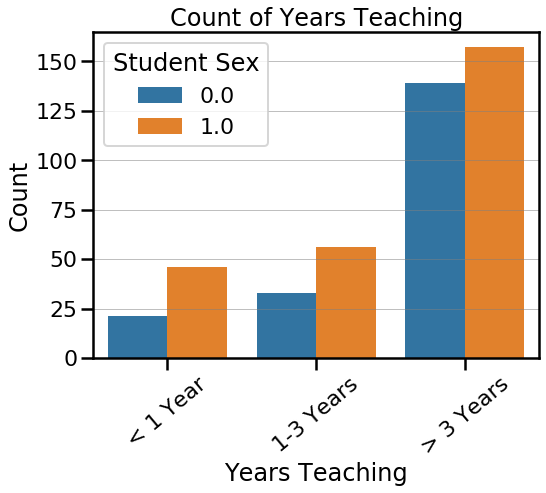

In [74]:
_ = plt.figure(figsize=(8, 6))
_ = sns.countplot(x='teacher_years_teaching', hue='student_sex',
                  data=df2004)
_ = plt.title('Count of Years Teaching')
_ = plt.xlabel('Years Teaching')
_ = plt.xticks(rotation=40)
_ = plt.ylabel('Count')
_ = plt.legend(title='Student Sex')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

df2003.teacher_years_teaching.value_counts()

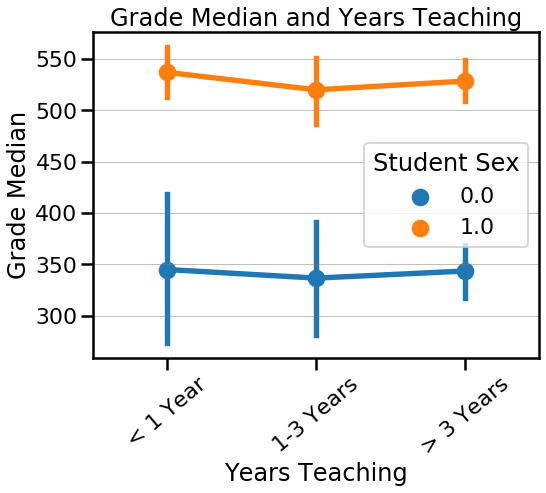

In [75]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='teacher_years_teaching', y='grade_median',
                  data=df2004, hue='student_sex', order=['< 1 Year', '1-3 Years', '> 3 Years'])
_ = plt.title('Grade Median and Years Teaching')
_ = plt.xlabel('Years Teaching')
_ = plt.xticks(rotation=40)
_ = plt.ylabel('Grade Median')
_ = plt.legend(title='Student Sex')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

### Unlike data from 2003, there is no correlation between the grade of students and the years a teacher has been teaching.

No     7763
Yes    4347
Name: teacher_from_mauza, dtype: int64

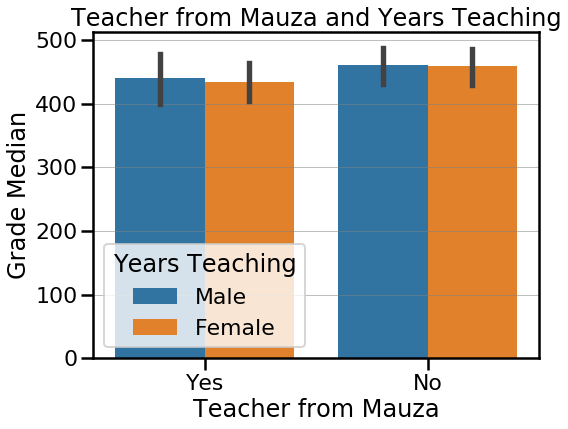

In [76]:
_ = plt.figure(figsize=(8, 6))
_ = sns.barplot(x='teacher_from_mauza', y='grade_median',
                  data=df2004, hue='teacher_sex')
_ = plt.title('Teacher from Mauza and Years Teaching')
_ = plt.xlabel('Teacher from Mauza')
_ = plt.ylabel('Grade Median')
_ = plt.legend(title='Years Teaching')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

df2003.teacher_from_mauza.value_counts()

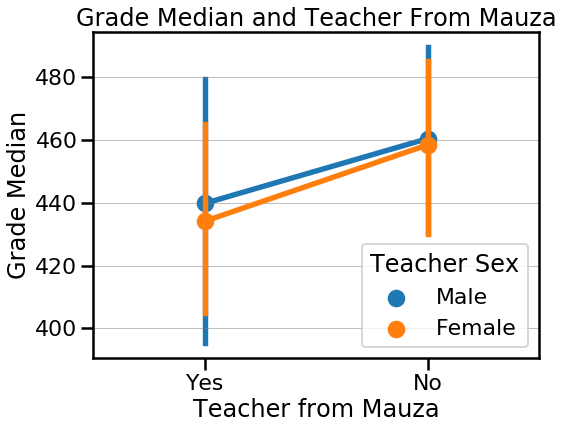

In [77]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='teacher_from_mauza', y='grade_median',
                  data=df2004, hue='teacher_sex')
_ = plt.title('Grade Median and Teacher From Mauza')
_ = plt.xlabel('Teacher from Mauza')
_ = plt.ylabel('Grade Median')
_ = plt.legend(title='Teacher Sex')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

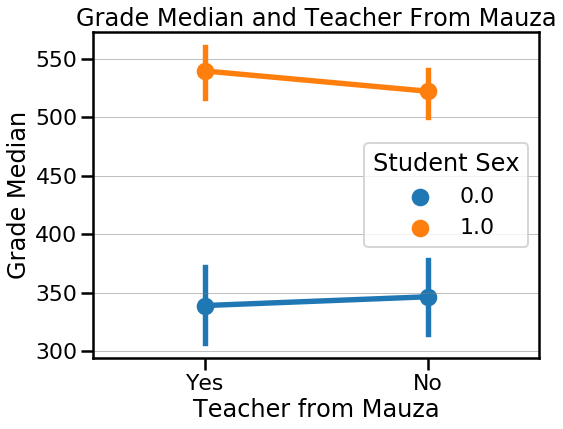

In [78]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='teacher_from_mauza', y='grade_median',
                  data=df2004, hue='student_sex')
_ = plt.title('Grade Median and Teacher From Mauza')
_ = plt.xlabel('Teacher from Mauza')
_ = plt.ylabel('Grade Median')
_ = plt.legend(title='Student Sex')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

### Unlike the 2003 dataset, there is not much of any correlation between grades and whether a teacher is from a mauza, except that females seem to benefit more from having a teacher from the same mauza than vice versa.

In [79]:
# drop the category "Madrassa" because it only had 4 instances.
df2004.school_type.cat.remove_categories(removals=['Madrassa'], inplace=True)

No     7763
Yes    4347
Name: teacher_from_mauza, dtype: int64

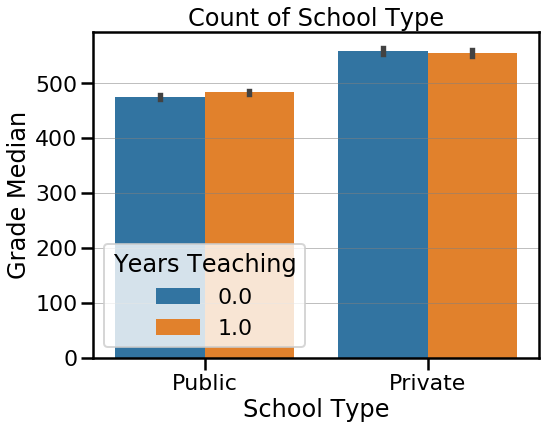

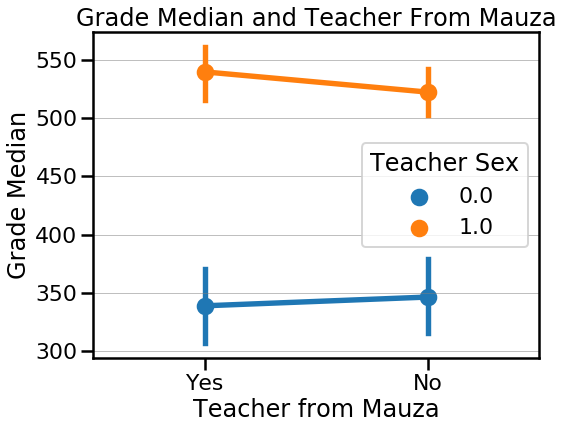

In [80]:
_ = plt.figure(figsize=(8, 6))
_ = sns.barplot(x='school_type', y='grade_median',
                  data=df2004, hue='student_sex')
_ = plt.title('Count of School Type')
_ = plt.xlabel('School Type')
_ = plt.ylabel('Grade Median')
_ = plt.legend(title='Years Teaching')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='teacher_from_mauza', y='grade_median',
                  data=df2004, hue='student_sex')
_ = plt.title('Grade Median and Teacher From Mauza')
_ = plt.xlabel('Teacher from Mauza')
_ = plt.ylabel('Grade Median')
_ = plt.legend(title='Teacher Sex')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5, axis='y')

df2003.teacher_from_mauza.value_counts()

In [81]:
# drop the category "Madrassa" because it only had 4 instances.
# df2004.school_type.cat.remove_categories(removals=['Madrassa'], inplace=True)

Public     14455
Private     4916
Name: school_type, dtype: int64

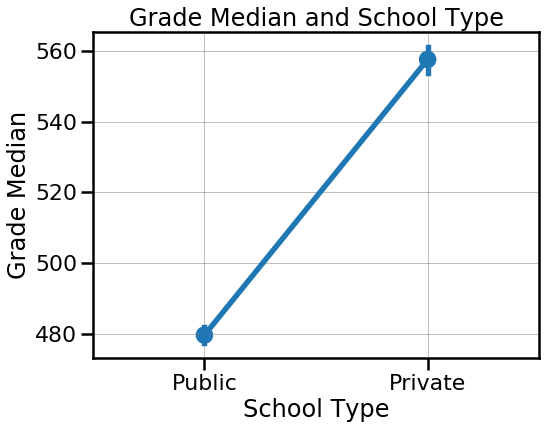

In [82]:
_ = plt.figure(figsize=(8, 6))
_ = sns.pointplot(x='school_type', y='grade_median', data=df2004)
_ = plt.title('Grade Median and School Type')
_ = plt.xlabel('School Type')
_ = plt.ylabel('Grade Median')
_ = plt.grid(color='grey', linestyle='-', linewidth=.5)

df2004.school_type.value_counts()

# Back to Data Cleaning

## Convert strings to integers

### I performed this after the Cleaning Data section to make more intuitive graphs.

In [83]:
# Dictionaries
# 5 is the number for NaNs
sex_int = {'Female': 0, 'Male': 1, np.nan: 5}
yes_no_int = {'No': 0, 'no': 0, 'Yes': 1, 'yes': 1, np.nan: 5}
school_type_int = {'Public': 0, 'Private': 1, 'Madrassa': 2, np.nan: 5}

# df2003
df2003.student_sex = [sex_int[item] for item in df2003.student_sex] 
df2003.teacher_sex = [sex_int[item] for item in df2003.teacher_sex]
df2003.child_studied_at_diff_school = [yes_no_int[item] for item in df2003.child_studied_at_diff_school]
df2003.own_agri_land_last_2_seasons = [yes_no_int[item] for item in df2003.own_agri_land_last_2_seasons]
df2003.i_vis_have = [yes_no_int[item] for item in df2003.i_vis_have]
df2003.print_have = [yes_no_int[item] for item in df2003.print_have]
df2003.teacher_from_mauza = [yes_no_int[item] for item in df2003.teacher_from_mauza]

In [84]:
# df2004.student_sex = [sex_int[item] for item in df2004.student_sex]
df2004.teacher_sex = [sex_int[item] for item in df2004.teacher_sex]
df2004.school_type = [school_type_int[item] for item in df2004.school_type]
df2004.studied_at_same_school_as_last_year = [yes_no_int[item] for item in df2004.studied_at_same_school_as_last_year]
df2004.teacher_survey_absent_emergency = [yes_no_int[item] for item in df2004.teacher_survey_absent_emergency]
df2004.teacher_survey_absent_office_work = [yes_no_int[item] for item in df2004.teacher_survey_absent_office_work]
df2004.teacher_survey_absent_other_work = [yes_no_int[item] for item in df2004.teacher_survey_absent_other_work]
df2004.teacher_from_mauza = [yes_no_int[item] for item in df2004.teacher_from_mauza]
df2004.child_studied_at_diff_school = [yes_no_int[item] for item in df2004.child_studied_at_diff_school]
df2004.radio = [yes_no_int[item] for item in df2004.radio]
df2004.television = [yes_no_int[item] for item in df2004.television]

In [85]:
# Here, I fill NaN values with the lesser observed sex: males.
imr = SimpleImputer(strategy='constant', fill_value=1)
imr = imr.fit(df2004[['student_sex']])
df2004.student_sex = imr.transform(df2004[['student_sex']]).ravel()

## Make Numeric-Only DataFrames for Predictive Modeling

In [86]:
df2003_num = df2003.copy()
df2003_num = df2003_num.drop(columns = ['hhid',
                    'mauzaid', 'teacher_rates_child_how_good_in_studies',
                    'teacher_years_teaching', 'teacher_qualifications', 'teacher_training',
                    'child_studied_at_diff_school', 'print_have', 'i_vis_have'])
print('Numeric-Only DataFrame for 2003:\n')
df2003_num.info()
print('\n\nNo NaNs or "None" objects:\n')
df2003_num.isna().sum()

Numeric-Only DataFrame for 2003:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12110 entries, 0 to 13734
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   grade_median                  12110 non-null  float64
 1   childcode                     12110 non-null  object 
 2   child_teachercode             12110 non-null  int32  
 3   child_schoolid1               12110 non-null  int8   
 4   english                       12110 non-null  float64
 5   urdu                          12110 non-null  float64
 6   math                          12110 non-null  float64
 7   student_sex                   12110 non-null  int64  
 8   grade                         12110 non-null  int8   
 9   teacher_sex                   12110 non-null  int64  
 10  salary_monthly_Rs             12110 non-null  float64
 11  teacher_from_mauza            12110 non-null  int64  
 12  teacher_days_absent_last_m

grade_median                    0
childcode                       0
child_teachercode               0
child_schoolid1                 0
english                         0
urdu                            0
math                            0
student_sex                     0
grade                           0
teacher_sex                     0
salary_monthly_Rs               0
teacher_from_mauza              0
teacher_days_absent_last_mo     0
own_agri_land_last_2_seasons    0
dtype: int64

In [87]:
df2004_num = df2004.copy()
df2004_num = df2004_num.drop(columns = ['teacher_years_teaching', 'teachercode', 'teacher_qualifications',
                    'teacher_training', 'type_of_housework_timeslot_5', 'child_helped',
                    'teacher_rates_child_how_good_in_studies',
                    'child_days_absent_last_mo', 'hh_child_in_govt_primary_school',
                    'supervisor_code', 'tehsil_census_code',
                    'hhid'])
print('Numeric-Only DataFrame for 2004:\n')
df2004_num.info()
print('\n\nNo NaNs or "None" objects:\n')
df2004_num.isna().sum()

Numeric-Only DataFrame for 2004:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64218 entries, 0 to 109147
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   grade_median                         64218 non-null  float64
 1   childcode                            64218 non-null  int32  
 2   child_teachercode                    64218 non-null  float64
 3   student_sex                          64218 non-null  float64
 4   english                              64218 non-null  float64
 5   math                                 64218 non-null  float64
 6   urdu                                 64218 non-null  float64
 7   grade                                64218 non-null  float64
 8   school_type                          64218 non-null  int64  
 9   studied_at_same_school_as_last_year  64218 non-null  int64  
 10  teacher_sex                          64218 non-null  int64 

grade_median                           0
childcode                              0
child_teachercode                      0
student_sex                            0
english                                0
math                                   0
urdu                                   0
grade                                  0
school_type                            0
studied_at_same_school_as_last_year    0
teacher_sex                            0
teacher_survey_absent_emergency        0
teacher_survey_absent_office_work      0
teacher_survey_absent_other_work       0
teacher_from_mauza                     0
child_studied_at_diff_school           0
radio                                  0
television                             0
dtype: int64

# Outliers

## Interquartile Range

In [88]:
# df2003 iqr
Q1 = df2003.grade_median.quantile(0.25)
Q3 = df2003.grade_median.quantile(0.75)
IQR = Q3 - Q1
print('df2003.grade_median:\nQ1:\n',Q1, '\nQ3:\n',Q3, '\nIQR:\n', IQR)

# df2004 iqr
Q1 = df2004.grade_median.quantile(0.25)
Q3 = df2004.grade_median.quantile(0.75)
IQR = Q3 - Q1
print('\ndf2004.grade_median:\nQ1:\n',Q1, '\nQ3:\n',Q3, '\nIQR:\n', IQR)

df2003.grade_median:
Q1:
 352.0 
Q3:
 570.75 
IQR:
 218.75

df2004.grade_median:
Q1:
 418.0 
Q3:
 598.0 
IQR:
 180.0


## After seeing the general scope of the data, the numbers and boxplots below show that each year of grades has an irregular bell curve. There are many more instances below two standard deviations than above them.

In [89]:
std_pos2 = df2003.grade_median[df2003.grade_median > (np.mean(df2003.grade_median + (2 * np.std(df2003.grade_median))))].count()
std_neg2 = df2003.grade_median[df2003.grade_median > (np.mean(df2003.grade_median - (2 * np.std(df2003.grade_median))))].count()
print('2003: Instances Two STDs above:', std_pos2, '\n2003: Instances Two STDs below:', std_neg2)

2003: Instances Two STDs above: 46 
2003: Instances Two STDs below: 11775


In [90]:
std_pos2 = df2004.grade_median[df2004.grade_median > (np.mean(df2004.grade_median + (2 * np.std(df2004.grade_median))))].count()
std_neg2 = df2004.grade_median[df2004.grade_median > (np.mean(df2004.grade_median - (2 * np.std(df2004.grade_median))))].count()
print('2004: Instances Two STDs above:', std_pos2, '\n2004: Instances Two STDs below:', std_neg2)

2004: Instances Two STDs above: 611 
2004: Instances Two STDs below: 61049


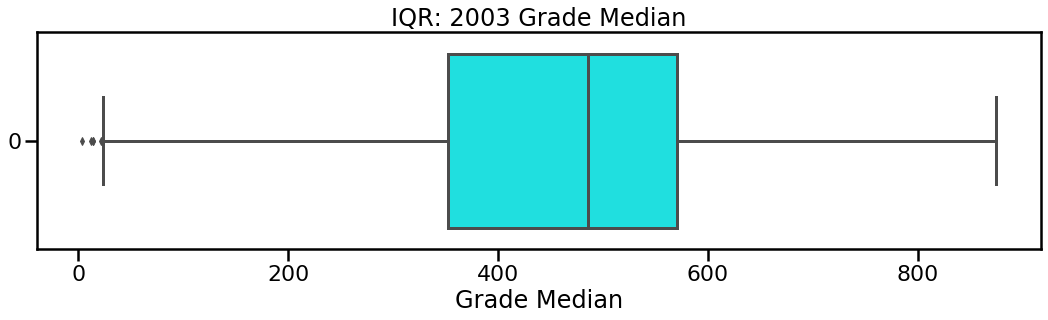

In [91]:
_ = plt.figure(figsize=(18, 4))
_ = sns.boxplot(data=df2003.grade_median, orient='h', color='cyan')
_ = plt.title('IQR: 2003 Grade Median')
_ = plt.xlabel('Grade Median')

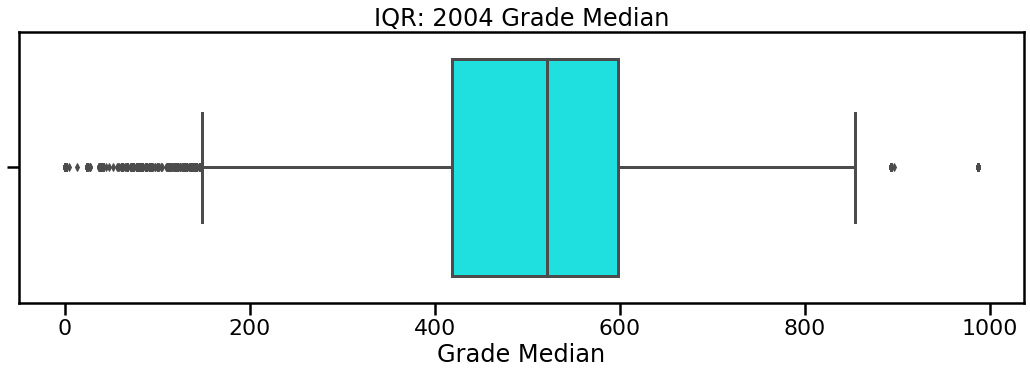

In [92]:
_ = plt.figure(figsize=(18, 5))
_ = sns.boxplot(df2004.grade_median, orient='h', color='cyan')
_ = plt.title('IQR: 2004 Grade Median')
_ = plt.xlabel('Grade Median')

### The 2004 dataset has a more narrow IQR than that of 2003.

## I cram the data into a normal bell curve using boxcox and then add the fitted data into the grades DataFrame. 

### Boxcox and df2003.grade_median

#### Boxcox will not compute numbers less than or equal to 0, so I replace 0s with the next closest number: 1.

In [93]:
df2004.grade_median.replace(to_replace=0, value=1, inplace=True)
df2004.grade_median.where(df2004.grade_median < 0.001).count()

0

In [94]:
fitted_data_03, fitted_lambda_03 = stats.boxcox(df2003.grade_median)

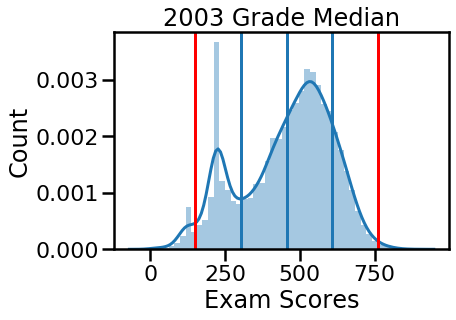

In [95]:
_ = sns.distplot(df2003.grade_median)
_ = plt.axvline(np.mean(df2003.grade_median) + np.std(df2003.grade_median))
_ = plt.axvline(np.mean(df2003.grade_median) + 2 * np.std(df2003.grade_median), c='r')
_ = plt.axvline(np.mean(df2003.grade_median) - np.std(df2003.grade_median))
_ = plt.axvline(np.mean(df2003.grade_median) - 2 * np.std(df2003.grade_median), c='r')
_ = plt.axvline(np.mean(df2003.grade_median))
_ = plt.title('2003 Grade Median')
_ = plt.xlabel('Exam Scores')
_ = plt.ylabel('Count')

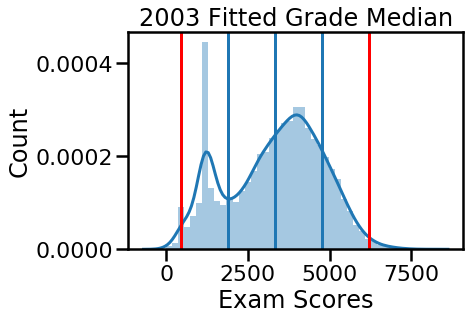

In [96]:
_ = sns.distplot(fitted_data_03)
_ = plt.axvline(np.mean(fitted_data_03) + np.std(fitted_data_03))
_ = plt.axvline(np.mean(fitted_data_03) + 2 * np.std(fitted_data_03), c='r')
_ = plt.axvline(np.mean(fitted_data_03) - np.std(fitted_data_03))
_ = plt.axvline(np.mean(fitted_data_03) - 2 * np.std(fitted_data_03), c='r')
_ = plt.axvline(np.mean(fitted_data_03))
_ = plt.title('2003 Fitted Grade Median')
_ = plt.xlabel('Exam Scores')
_ = plt.ylabel('Count')

In [97]:
print('03: Excess kurtosis of normal distribution (should be 0): {}'.format(stats.kurtosis(df2003.grade_median)))
print('03: Skewness of normal distribution (should be 0): {}'.format(stats.skew(df2003.grade_median)))

03: Excess kurtosis of normal distribution (should be 0): -0.6290586327228693
03: Skewness of normal distribution (should be 0): -0.4546228973565746


In [98]:
print('03, fitted: Excess kurtosis of normal distribution (should be 0): {}'.format(stats.kurtosis(fitted_data_03)))
print('03, fitted: Skewness of normal distribution (should be 0): {}'.format(stats.skew(fitted_data_03)))

03, fitted: Excess kurtosis of normal distribution (should be 0): -0.7787044663095655
03, fitted: Skewness of normal distribution (should be 0): -0.2093600159133431


#### Though the shape of the bell curve is less idea with the fitted data, we have achieved a closer approximation of a normal bell curve.

### Boxcox and df2004.grade_median

#### Boxcox will not compute numbers less than or equal to 0, so I replace 0s with the next closest number: 1.

In [99]:
df2004.grade_median.replace(to_replace=0, value=1, inplace=True)
df2004.grade_median.where(df2004.grade_median < 0.001).count()

0

In [100]:
fitted_data_04, fitted_lambda_04 = stats.boxcox(df2004.grade_median)

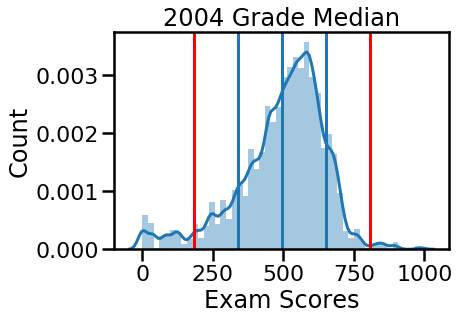

In [101]:
_ = sns.distplot(df2004.grade_median)
_ = plt.axvline(np.mean(df2004.grade_median) + np.std(df2004.grade_median))
_ = plt.axvline(np.mean(df2004.grade_median) + 2 * np.std(df2004.grade_median), c='r')
_ = plt.axvline(np.mean(df2004.grade_median) - np.std(df2004.grade_median))
_ = plt.axvline(np.mean(df2004.grade_median) - 2 * np.std(df2004.grade_median), c='r')
_ = plt.axvline(np.mean(df2004.grade_median))
_ = plt.title('2004 Grade Median')
_ = plt.xlabel('Exam Scores')
_ = plt.ylabel('Count')

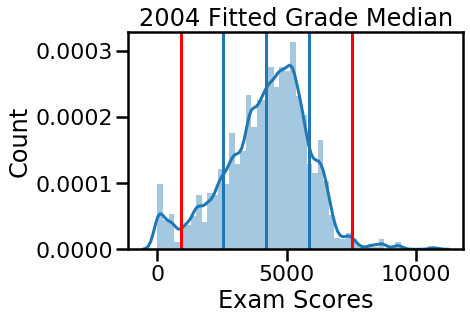

In [102]:
_ = sns.distplot(fitted_data_04)
_ = plt.axvline(np.mean(fitted_data_04) + np.std(fitted_data_04))
_ = plt.axvline(np.mean(fitted_data_04) + 2 * np.std(fitted_data_04), c='r')
_ = plt.axvline(np.mean(fitted_data_04) - np.std(fitted_data_04))
_ = plt.axvline(np.mean(fitted_data_04) - 2 * np.std(fitted_data_04), c='r')
_ = plt.axvline(np.mean(fitted_data_04))
_ = plt.title('2004 Fitted Grade Median')
_ = plt.xlabel('Exam Scores')
_ = plt.ylabel('Count')

In [103]:
print('04: Excess kurtosis of normal distribution (should be 0): {}'.format(stats.kurtosis(df2004.grade_median)))
print('04: Sknewness of normal distribution (should be 0): {}'.format(stats.skew(df2004.grade_median)))

04: Excess kurtosis of normal distribution (should be 0): 1.1521764545937279
04: Sknewness of normal distribution (should be 0): -0.8973145248875378


In [104]:
print('04, fitted: Excess kurtosis of normal distribution (should be 0): {}'.format(stats.kurtosis(fitted_data_04)))
print('04, fitted: Skewness of normal distribution (should be 0): {}'.format(stats.skew(fitted_data_04)))

04, fitted: Excess kurtosis of normal distribution (should be 0): 0.35283903243982495
04, fitted: Skewness of normal distribution (should be 0): -0.3514797109009163


#### Unlike the 2003 fitted data, these form a better kurtosis and skew all around.

### Add the fitted data in the DataFrames

In [105]:
# Add two columns of the fitted data from boxcox
df2003.insert(1, 'grade_median_fitted', fitted_data_03)
df2003_num.insert(1, 'grade_median_fitted', fitted_data_03)
df2004.insert(1, 'grade_median_fitted', fitted_data_04)
df2004_num.insert(1, 'grade_median_fitted', fitted_data_04)

### Compare and Contrast

In [106]:
# make df with grades from both years
grades = pd.merge(df2003_num[['childcode', 'grade_median', 'grade_median_fitted']],
                             df2003_num[['childcode', 'grade_median', 'grade_median_fitted']],
                       on='childcode', how = 'outer', suffixes = ('_03', '_04'))
grades = grades.drop(columns=['childcode'])
print('Standard Deviations:\n', np.std(grades))

Standard Deviations:
 grade_median_03            153.045383
grade_median_fitted_03    1436.360065
grade_median_04            153.045383
grade_median_fitted_04    1436.360065
dtype: float64


## Observe Correlations

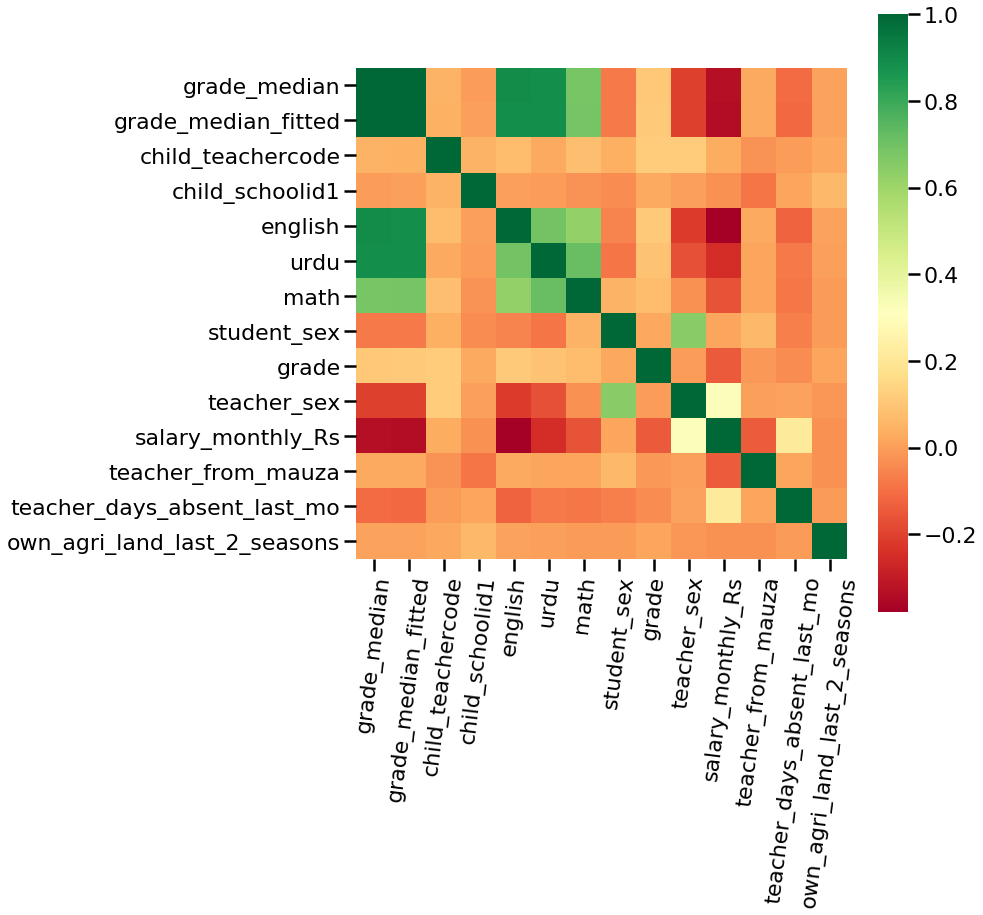

In [107]:
_ = plt.figure(figsize=(11, 11))
_ = sns.heatmap(df2003_num.corr(), square=True, cmap='RdYlGn')
_ = plt.xticks(rotation=83)

### Only for 2003, there is a correlation between teacher and student sex.

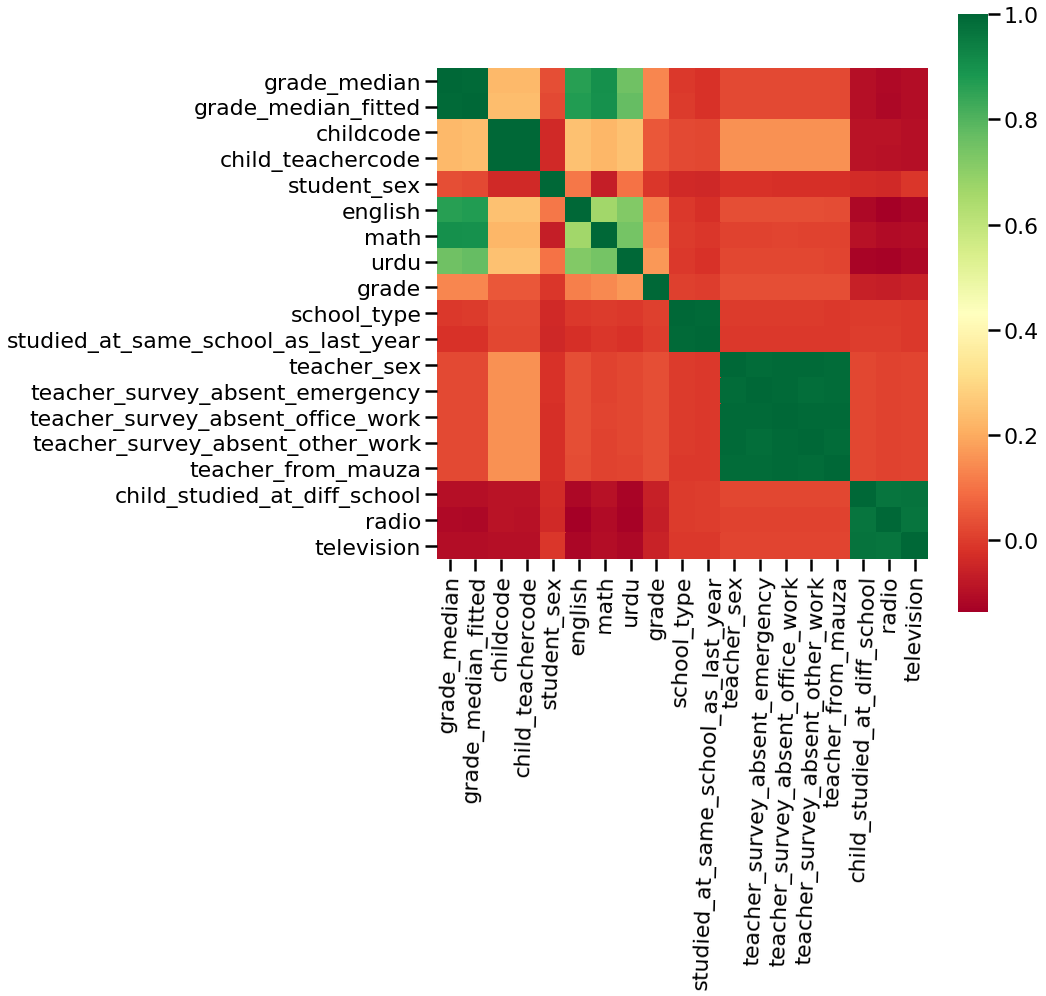

In [108]:
_ = plt.figure(figsize=(11, 11))
_ = sns.heatmap(df2004_num.corr(), square=True, cmap='RdYlGn')
_ = plt.xticks(rotation=88)

In [109]:
# statsmodels works nicely with pandas dataframes
m = ols('math ~ grade_median', df2003_num).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                   math   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                 1.084e+04
Date:                Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:31:19   Log-Likelihood:                -73961.
No. Observations:               12110   AIC:                         1.479e+05
Df Residuals:                   12108   BIC:                         1.479e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      193.3588      3.103     62.314   

## Create and Reshape Variables

In [152]:
# Create arrays for features and target variable
y2003 = df2003_num['grade_median_fitted'].copy().values
X2003 = df2003_num.copy().drop(['grade_median', 'grade_median_fitted'], axis=1)
X2003_no_derivatives = df2003_num.copy().drop(['grade_median', 'grade_median_fitted',
                                'math', 'english', 'urdu'], axis=1)
X2003_columns = X2003.copy().columns

y2004 = df2004_num['grade_median_fitted'].copy().values
X2004 = df2004_num.copy().drop('grade_median_fitted', axis=1)
X2004_no_derivatives = df2004_num.copy().drop(['grade_median', 'grade_median_fitted',
                                'math', 'english', 'urdu'], axis=1)
X2004_columns = X2004.copy().columns

In [111]:
print(type(y2003))
print(type(X2003))
print(type(X2003_columns))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.indexes.base.Index'>


## 1. Linear Regression

### 2003

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X2003, y2003, test_size=.3,random_state=42)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('R^2: {}'.format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  

print('Root Mean Squared Error: {}'.format(rmse))
print('Mean of RMSE: {}'.format(np.mean(cross_val_score(reg,X2003,y2003,
                                scoring='neg_mean_squared_error', cv=5))))
print('Linear Regression Score:', reg.score(X_test, y_test))

R^2: 0.9383675011236617
Mean Absolute Error: 271.557350947338
Root Mean Squared Error: 353.2639276250026
Mean of RMSE: -130544.09117819217
Linear Regression Score: 0.9383675011236617


In [113]:
coeff_03 = pd.DataFrame(reg.coef_, X2003.columns, columns=['Coefficient'])
coeff_03.sort_values(by='Coefficient', ascending=False)

,Coefficient
grade,44.781093
teacher_sex,10.133302
own_agri_land_last_2_seasons,5.320516
english,5.116143
urdu,5.104502
teacher_from_mauza,0.975854
childcode,0.083700
salary_monthly_Rs,-0.005418
child_schoolid1,-0.203828
math,-0.216974


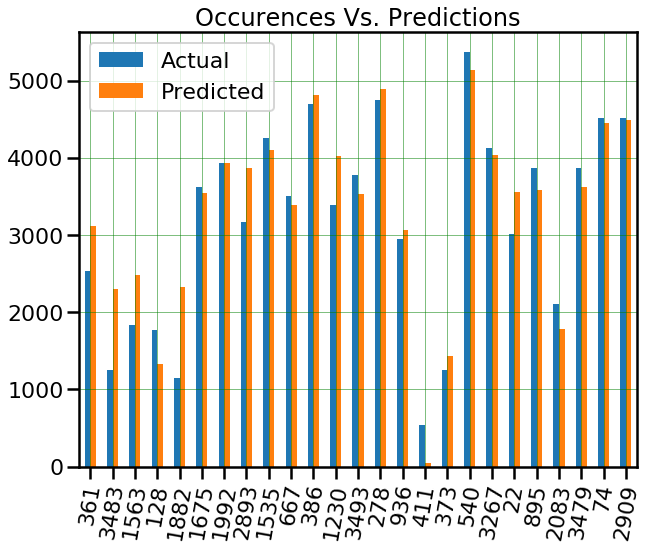

In [114]:
df_y_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_y_pred1 = df_y_pred.sample(25)

_ = df_y_pred1.plot(kind='bar',figsize=(10,8))
_ = plt.title('Occurences Vs. Predictions')
_ = plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
_ = plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
_ = plt.xticks(rotation=80)
_ = plt.show()

In [115]:
# plot each column individually / most important features
# model.feature_importance ~ is an attribute of most models
#     linear models give coef

In [116]:
reg = LinearRegression()
cv_scores = cross_val_score(reg, X2003, y2003, cv=5)
print('CV Scores:', cv_scores)

print('Average 5-Fold CV Score: {}'.format(np.mean(cv_scores)))

CV Scores: [0.94646724 0.94383624 0.92294905 0.93246112 0.93319571]
Average 5-Fold CV Score: 0.9357818710373106


In [117]:
reg = LinearRegression()

# 3-Fold Cross Validation
cvscores_3 = cross_val_score(reg, X2003, y2003, cv=3)
print('Mean of 3 CV:', np.mean(cvscores_3))

# 10 Fold
cvscores_10 = cross_val_score(reg, X2003, y2003, cv=10)
print('Mean of 10 CV:', np.mean(cvscores_10))

# Print the accuracy from the testing data
# accuracy_score(reg.fit(y_03, y_pred))
# print(accuracy_score(reg.predict(y_03), y_pred))

Mean of 3 CV: 0.9333430089760495
Mean of 10 CV: 0.9348798210724638


### 2003 No Derivatives

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X2003_no_derivatives, y2003, test_size=.3,random_state=42)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('R^2: {}'.format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  

print('Root Mean Squared Error: {}'.format(rmse))
print('Mean of RMSE: {}'.format(np.mean(cross_val_score(reg,X2003,y2003,
                                scoring='neg_mean_squared_error', cv=5))))
print('Linear Regression Score:', reg.score(X_test, y_test))

R^2: 0.1399609779559613
Mean Absolute Error: 1085.1528800577453
Root Mean Squared Error: 1319.6339598052334
Mean of RMSE: -130544.09117819217
Linear Regression Score: 0.1399609779559613


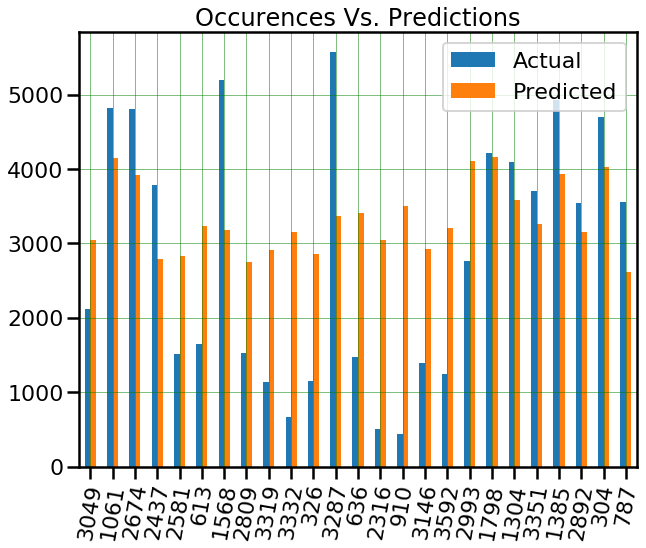

In [119]:
df_y_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_y_pred1 = df_y_pred.sample(25)

_ = df_y_pred1.plot(kind='bar',figsize=(10,8))
_ = plt.title('Occurences Vs. Predictions')
_ = plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
_ = plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
_ = plt.xticks(rotation=80)
_ = plt.show()

In [120]:
reg = LinearRegression()
cv_scores = cross_val_score(reg, X2003_no_derivatives, y2003, cv=5)
print('CV Scores:', cv_scores)

print('Average 5-Fold CV Score: {}'.format(np.mean(cv_scores)))

CV Scores: [0.17353568 0.15737363 0.09157907 0.10719272 0.03964194]
Average 5-Fold CV Score: 0.11386460972072862


In [121]:
reg = LinearRegression()

# 3-Fold Cross Validation
cvscores_3 = cross_val_score(reg, X2003_no_derivatives, y2003, cv=3)
print('Mean of 3 CV:', np.mean(cvscores_3))

# 10 Fold
cvscores_10 = cross_val_score(reg, X2003_no_derivatives, y2003, cv=10)
print('Mean of 10 CV:', np.mean(cvscores_10))

# Print the accuracy from the testing data
# accuracy_score(reg.fit(y_03, y_pred))
# print(accuracy_score(reg.predict(y_03), y_pred))

Mean of 3 CV: 0.09978340127190277
Mean of 10 CV: 0.10988943517117344


### 2004

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X2004, y2004, test_size=.3,random_state=42)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('R^2: {}'.format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  

print('Root Mean Squared Error: {}'.format(rmse))
print('Mean of RMSE: {}'.format(np.mean(cross_val_score(reg,X2003,y2003,
                                scoring='neg_mean_squared_error', cv=5))))
print('Linear Regression Score:', reg.score(X_test, y_test))

R^2: 0.9861712030826679
Mean Absolute Error: 129.13483150650163
Root Mean Squared Error: 194.43313951468488
Mean of RMSE: -130544.09117819217
Linear Regression Score: 0.9861712030826679


In [123]:
coeff_04 = pd.DataFrame(reg.coef_, X2004.columns, columns=['Coefficient'])
coeff_04.sort_values(by='Coefficient', ascending=False)

,Coefficient
school_type,29.856726
television,16.455637
teacher_survey_absent_office_work,15.853594
teacher_survey_absent_other_work,11.259020
grade_median,9.251267
teacher_sex,2.277348
english,0.822612
math,0.454645
urdu,0.360114
childcode,0.000009


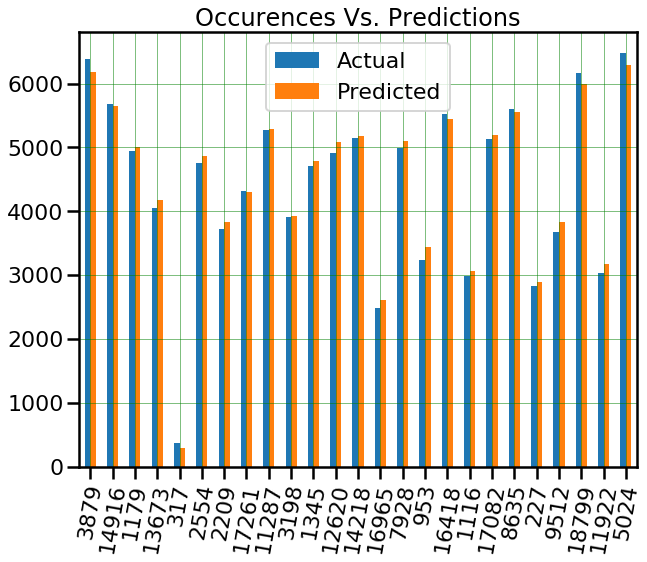

In [124]:
df_y_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_y_pred1 = df_y_pred.sample(25)

_ = df_y_pred1.plot(kind='bar',figsize=(10,8))
_ = plt.title('Occurences Vs. Predictions')
_ = plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
_ = plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
_ = plt.xticks(rotation=80)
_ = plt.show()

In [125]:
reg = LinearRegression()
cv_scores = cross_val_score(reg, X2003, y2003, cv=5)
print('CV Scores:', cv_scores)

print('Average 5-Fold CV Score: {}'.format(np.mean(cv_scores)))

CV Scores: [0.94646724 0.94383624 0.92294905 0.93246112 0.93319571]
Average 5-Fold CV Score: 0.9357818710373106


In [126]:
reg = LinearRegression()

# 3-Fold Cross Validation
cvscores_3 = cross_val_score(reg, X2003, y2003, cv=3)
print('Mean of 3 CV:', np.mean(cvscores_3))

# 10 Fold
cvscores_10 = cross_val_score(reg, X2003, y2003, cv=10)
print('Mean of 10 CV:', np.mean(cvscores_10))

# Print the accuracy from the testing data
# accuracy_score(reg.fit(y2003, y_pred))
# print(accuracy_score(reg.predict(y_03), y_pred))

Mean of 3 CV: 0.9333430089760495
Mean of 10 CV: 0.9348798210724638


### 2004 No Derivatives

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X2004_no_derivatives, y2004, test_size=.3,random_state=42)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('R^2: {}'.format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  

print('Root Mean Squared Error: {}'.format(rmse))
print('Mean of RMSE: {}'.format(np.mean(cross_val_score(reg, X2004_no_derivatives, y2004,
                                scoring='neg_mean_squared_error', cv=5))))
print('Linear Regression Score:', reg.score(X_test, y_test))

R^2: 0.0977037070040393
Mean Absolute Error: 1225.2304232322517
Root Mean Squared Error: 1570.553286434264
Mean of RMSE: -2667895.355364886
Linear Regression Score: 0.0977037070040393


In [128]:
coeff_04 = pd.DataFrame(reg.coef_, X2004_no_derivatives.columns, columns=['Coefficient'])
coeff_04.sort_values(by='Coefficient', ascending=False)

,Coefficient
grade,864.174910
school_type,546.820686
child_studied_at_diff_school,103.798936
student_sex,81.863019
teacher_survey_absent_emergency,55.376457
teacher_survey_absent_office_work,43.162545
television,22.974085
childcode,0.000377
child_teachercode,-0.002949
teacher_sex,-36.104980


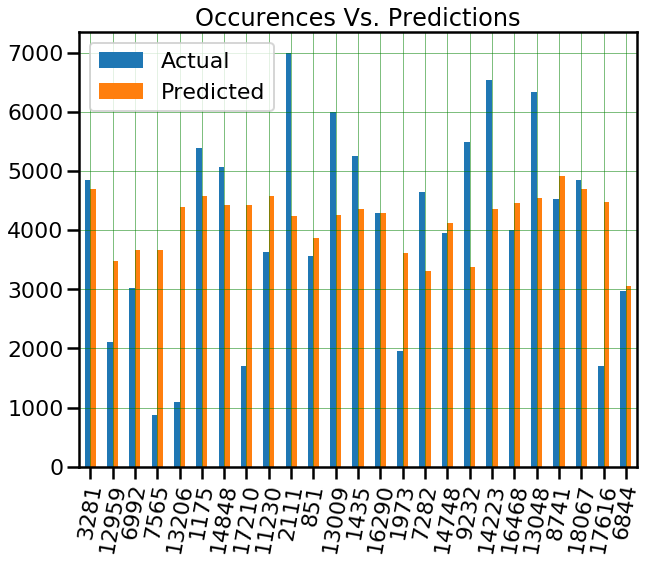

In [129]:
df_y_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_y_pred1 = df_y_pred.sample(25)

_ = df_y_pred1.plot(kind='bar',figsize=(10,8))
_ = plt.title('Occurences Vs. Predictions')
_ = plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
_ = plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
_ = plt.xticks(rotation=80)
_ = plt.show()

In [130]:
reg = LinearRegression()
cv_scores = cross_val_score(reg, X2004_no_derivatives, y2004, cv=5)
print('CV Scores:', cv_scores)

print('Average 5-Fold CV Score: {}'.format(np.mean(cv_scores)))

CV Scores: [ 0.00512663  0.00458366  0.00776507 -0.10022203 -0.17447813]
Average 5-Fold CV Score: -0.05144496173297104


In [131]:
reg = LinearRegression()

# 3-Fold Cross Validation
cvscores_3 = cross_val_score(reg, X2004_no_derivatives, y2004, cv=3)
print('Mean of 3 CV:', np.mean(cvscores_3))

# 10 Fold
cvscores_10 = cross_val_score(reg, X2004_no_derivatives, y2004, cv=10)
print('Mean of 10 CV:', np.mean(cvscores_10))

# Print the accuracy from the testing data
# accuracy_score(reg.fit(y2003, y_pred))
# print(accuracy_score(reg.predict(y_03), y_pred))

Mean of 3 CV: 0.004874737324731686
Mean of 10 CV: -0.026453778649572813


### The "No Derivatives" dataset perform quite poorly (about 0.1). This makes some sense in that research psychologists have not found factors with stronger predictive power in terms of completing complex tasks than those that assess intelligence, namely, IQ and the g factor.

## Model 2: Feature Scaling: Five Scalers and Three Models
### https://towardsdatascience.com/feature-scaling-effect-of-different-scikit-learn-scalers-deep-dive-8dec775d4946

In [132]:
from sklearn.datasets import make_regression
import numpy as np
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import *
from sklearn.linear_model import *

In [133]:
regressors=[StandardScaler(),MinMaxScaler(),
PowerTransformer(method='yeo-johnson'),
RobustScaler(quantile_range=(25,75)),MaxAbsScaler()]

In [134]:
models=[Ridge(alpha=1.0), HuberRegressor(), LinearRegression()]

In [154]:
X2004_math = df2004_num['math'].copy()
X_train, X_test, y_train, y_test = train_test_split(X2004, y2004, test_size=.2,random_state=42)
'''X_train = np.asarray(X_train)
X_train = X_train.reshape(1, -1)
X_test = np.asarray(X_test)
X_test = X_test.reshape(1, -1)'''
X_train.shape

(51374, 18)

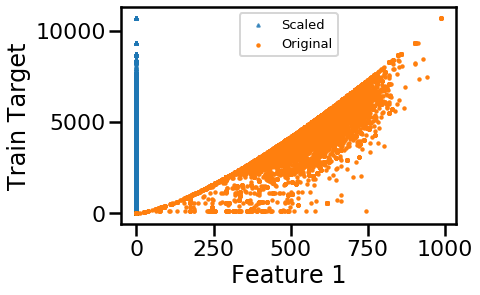

The calculated coefficients with  Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 
and StandardScaler(copy=True, with_mean=True, with_std=True) [0.] 


The calculated coefficients with  HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False) 
and StandardScaler(copy=True, with_mean=True, with_std=True) [0.] 


The calculated coefficients with  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 
and StandardScaler(copy=True, with_mean=True, with_std=True) [0.] 




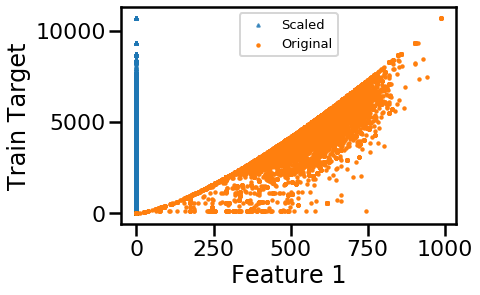

The calculated coefficients with  Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 
and MinMaxScaler(copy=True, feature_range=(0, 1)) [0.] 


The calculated coefficients with  HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False) 
and MinMaxScaler(copy=True, feature_range=(0, 1)) [0.] 


The calculated coefficients with  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 
and MinMaxScaler(copy=True, feature_range=(0, 1)) [0.] 




/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


KeyboardInterrupt: 

In [136]:
for regressor in regressors:
    X_train_scaled = regressor.fit_transform(X_train)
    X_test_scaled = regressor.transform(X_test)
    Scaled = plt.scatter(X_train_scaled,y_train, marker='^', alpha=0.8, s=6)
    Original = plt.scatter(X_train,y_train, s=6)
    plt.legend((Scaled, Original),('Scaled', 'Original'),loc='best',fontsize=13)
    plt.xlabel("Feature 1")
    plt.ylabel("Train Target")         
    plt.show()
    X_train_scaled = X_train_scaled.reshape(-1, 1)
    X_test_scaled = X_test_scaled.reshape(-1, 1)
    for model in models:
        reg_lin = model.fit(X_train_scaled, y_train)
        y_pred = reg_lin.predict(X_test_scaled)   
        print("The calculated coefficients with ", model , "\nand", regressor, reg_lin.coef_,'\n\n')

## 3. Ridge Regression

### cf. https://towardsdatascience.com/how-to-perform-lasso-and-ridge-regression-in-python-3b3b75541ad8

In [137]:
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X2003, y2003)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-130496.07233412164


In [138]:
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X2003, y2003)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 624029624.9143875, tolerance: 1932085.8541309338
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 623608582.0744909, tolerance: 1952453.6194558123
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 598889784.7832794, tolerance: 2038253.3080348829
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

{'alpha': 20}
-129879.17427869103


## 4. Lasso

In [139]:
lasso = Lasso(alpha = 0.4, normalize = True)
lasso.fit(X2003, y2003)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

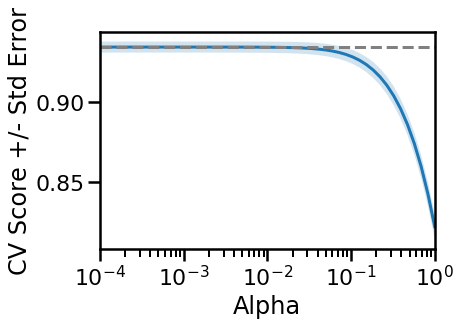

In [140]:
# Import plotting function from DataCamp
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:
    
    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X2003, y2003, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))
    
# Display the plot
display_plot(ridge_scores, ridge_scores_std)

## 5. Elastic Net

In [141]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X2003, y2003, test_size = 0.4, random_state = 42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369734384.68295676, tolerance: 1198060.5312518398
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378493847.01993895, tolerance: 1213620.1200070004
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 374723252.92175287, tolerance: 1223249.6982851464
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

KeyboardInterrupt: 

## 6. SVC

## Scaler and Pipeline: Elastic Net

In [155]:
# Scale the features
X_scaled = scale(X2003)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X2003))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X2003)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: childcode                       7.828129e+06
child_teachercode               7.828157e+05
child_schoolid1                 1.001404e+01
english                         4.994642e+02
urdu                            4.995004e+02
math                            4.995823e+02
student_sex                     5.531792e-01
grade                           3.018497e+00
teacher_sex                     4.438481e-01
salary_monthly_Rs               4.147607e+03
teacher_from_mauza              3.589595e-01
teacher_days_absent_last_mo     2.122543e+00
own_agri_land_last_2_seasons    4.661024e+00
dtype: float64
Standard Deviation of Unscaled Features: childcode                       4.508897e+06
child_teachercode               4.508895e+05
child_schoolid1                 1.787662e+01
english                         1.498868e+02
urdu                            1.499514e+02
math                            1.496158e+02
student_sex                     4.971639e-01
grade            

In [ ]:
# Setup the pipeline steps
steps = [
        ('scaler', StandardScaler()),
        ('elasticnet', ElasticNet())]

#Create the pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio': np.linspace(0, 1, 30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X2003, y2003, test_size=0.4, random_state=42)

# Create the GridSearchCV object
gm_cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

#Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print('Tuned ElasticNet Alpha: {}'.format(gm_cv.best_params_))
print('Tuned ElasticNet R squared: {}'.format(r2))

In [ ]:
# Decision Trees, logistic regression

## 7. SVR: Support Vector Regression

In [149]:
X2004_math.shape

(1, 64218)

In [150]:
y2004.shape

(64218, 1)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X2004_math, y2004, test_size=.3,random_state=42)
#X2004_math = np.asarray(X2004_math).reshape(1, -1)
#y2004 = y2004.reshape(-1, 1)

ValueError: Found input variables with inconsistent numbers of samples: [1, 64218]

In [147]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X2004_math)
y = sc_y.fit_transform(y2004)

In [144]:
from sklearn.svm import SVR

y = y.ravel()
X = X.reshape(-1,1)
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [145]:

y_pred = regressor.predict(X)
y_pred = sc_y.inverse_transform(y_pred) 

KeyboardInterrupt: 

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error 

In [ ]:
def svr_results(y_test, X_test, fitted_svr_model):
    
    print("C: {}".format(fitted_svr_model.C))
    print("Epsilon: {}".format(fitted_svr_model.epsilon))
    
    print("Intercept: {:,.3f}".format(fitted_svr_model.intercept_[0]))
    print("Coefficient: {:,.3f}".format(fitted_svr_model.coef_[0]))
    
    mae = mean_absolute_error(y_test, fitted_svr_model.predict(X_test))
    print("MAE = ${:,.2f}".format(1000*mae))
    
    perc_within_eps = 100*np.sum(y_test - fitted_svr_model.predict(X_test) < eps) / len(y_test)
    print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))
    
    # Plot outputs
    plt.figure(figsize=(10,7))
    plt.scatter(x=df['rooms'], y=df['cmedv'])
    plt.plot(X_test, fitted_svr_model.predict(X_test), color='red')
    plt.plot(X_test, fitted_svr_model.predict(X_test)+eps, color='black')
    plt.plot(X_test, fitted_svr_model.predict(X_test)-eps, color='black')
    plt.xlabel('# of Rooms')
    plt.ylabel('House Price (Thousands of Dollars)')
    plt.title('SVR Prediction')
    plt.show()

In [ ]:
from sklearn.svm import LinearSVR
eps = 5
svr = LinearSVR(epsilon=eps, C=0.01, fit_intercept=True)

In [ ]:
X_train = np.asarray(X2004_math).reshape(-1, 2)
y2004 = y2004.reshape(-1, 1)

In [ ]:
X_test = X_test.reshape(-1, 1)
X_test

In [ ]:
y_test = y_test.reshape(-1, 1)

In [ ]:
svr.fit(X_train, y_train)

In [ ]:
svr_results(y_test, X_test, svr)